<a id='Notebook'></a>  
# Pandas DataFrames
- pandas provides two standardized data structures for tabular data  
  - Series — A one-dimensional structure, used to represent a vector, i.e., a table column
  - DataFrame — A two-dimensional structure, used to represent a table 
    - each column in a DataFrame is a Series
- pandas is an extension of numpy  
  - series are labelled numpy arrays that represent table columns

[Create](#Pandas-Create)    
[Import](#Pandas-Import)  
[Explore](#Pandas-Explore)  
[Transform](#Pandas-Transform)  
[Select](#Pandas-Select)  
[Filter](#Pandas-Filter)  
[Aggregate](#Pandas-Aggregate)  
[Group](#Pandas-Group)  
[Merge](#Pandas-Merge)  
[Visualize](#Pandas-Visualize)  
[Export](#Pandas-Export)

### Packages

In [1]:
import os
import glob
import calendar

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import numpy as np
import pandas as pd
import earthpy as et 

from pandas.api.types import CategoricalDtype

In [2]:
pd.__version__

'1.3.4'

In [3]:
np.__version__

'1.21.3'

### *Parameters*

In [4]:
# shows result of cell without needing print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr_or_assign"

### *Constants*
Using: List Comprehension, Dictionary, Enumerate

In [5]:
months = [month for month in calendar.month_abbr if month]
print(months)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [6]:
seasons = ['Spring', 'Summer', 'Autumn','Winter']

['Spring', 'Summer', 'Autumn', 'Winter']

In [7]:
seasons_month_num_dict = {}
for i, season in enumerate(seasons):
    seasons_month_num_dict[season] = (i+1) * 3
seasons_month_num_dict

{'Spring': 3, 'Summer': 6, 'Autumn': 9, 'Winter': 12}

In [8]:
months_season_dict = {}
for i, month in enumerate(months):
    if i <= 1:
        months_season_dict[month] = seasons[3]
    elif i <= 4:
        months_season_dict[month] = seasons[0]
    elif i <= 7:
        months_season_dict[month] = seasons[1]
    elif i <= 10:
        months_season_dict[month] = seasons[2]
    else:
        months_season_dict[month] = seasons[3]
months_season_dict

{'Jan': 'Winter',
 'Feb': 'Winter',
 'Mar': 'Spring',
 'Apr': 'Spring',
 'May': 'Spring',
 'Jun': 'Summer',
 'Jul': 'Summer',
 'Aug': 'Summer',
 'Sep': 'Autumn',
 'Oct': 'Autumn',
 'Nov': 'Autumn',
 'Dec': 'Winter'}

### *Categoricals*

In [9]:
months_cat = CategoricalDtype(months, ordered=True)

CategoricalDtype(categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                  'Sep', 'Oct', 'Nov', 'Dec'],
, ordered=True)

In [10]:
seasons_cat = CategoricalDtype(seasons, ordered=True)

CategoricalDtype(categories=['Spring', 'Summer', 'Autumn', 'Winter'], ordered=True)

### *Palettes*

In [11]:
seaborn_viridis_palette = sns.color_palette("viridis_r",4)
seaborn_viridis_palette

[(0.477504, 0.821444, 0.318195),
 (0.134692, 0.658636, 0.517649),
 (0.163625, 0.471133, 0.558148),
 (0.253935, 0.265254, 0.529983)]

In [12]:
seasons_palette_dict={}
for i, season in enumerate(seasons):
    seasons_palette_dict[season] = seaborn_viridis_palette[i]
seasons_palette_dict

{'Spring': (0.477504, 0.821444, 0.318195),
 'Summer': (0.134692, 0.658636, 0.517649),
 'Autumn': (0.163625, 0.471133, 0.558148),
 'Winter': (0.253935, 0.265254, 0.529983)}

In [13]:
reds_color_palette = sns.color_palette("Reds",18)

[(0.99840061514802, 0.92719723183391, 0.893194925028835),
 (0.99680123029604, 0.8936101499423299, 0.8452133794694348),
 (0.994079200307574, 0.8414455978469819, 0.7745482506728181),
 (0.9908804306036141, 0.7822683583237217, 0.6961783929257978),
 (0.9882352941176471, 0.7169396386005382, 0.6125797770088427),
 (0.9882352941176471, 0.6513648596693579, 0.5374086889657824),
 (0.9882352941176471, 0.5807458669742407, 0.45645520953479435),
 (0.9868358323721645, 0.5165705497885429, 0.3910803537101115),
 (0.985113417916186, 0.4476739715494041, 0.32218377547097277),
 (0.974717416378316, 0.37810073048827375, 0.26620530565167244),
 (0.9540484429065744, 0.29714725105728584, 0.21453287197231846),
 (0.9300576701268742, 0.22437524029219533, 0.1695501730103806),
 (0.8680507497116493, 0.16409073433294888, 0.14371395617070357),
 (0.810472895040369, 0.1081122645136486, 0.11972318339100346),
 (0.7458208381391772, 0.08221453287197232, 0.10314494425221069),
 (0.685044213763937, 0.06782006920415225, 0.09034986543637061),
 (0.6022452902729719, 0.04798154555940023, 0.07657054978854286),
 (0.5030834294502115, 0.023990772779700117, 0.0637754709727028)]

In [14]:
anomaly_color_palette = reds_color_palette[6:]

[(0.9882352941176471, 0.5807458669742407, 0.45645520953479435),
 (0.9868358323721645, 0.5165705497885429, 0.3910803537101115),
 (0.985113417916186, 0.4476739715494041, 0.32218377547097277),
 (0.974717416378316, 0.37810073048827375, 0.26620530565167244),
 (0.9540484429065744, 0.29714725105728584, 0.21453287197231846),
 (0.9300576701268742, 0.22437524029219533, 0.1695501730103806),
 (0.8680507497116493, 0.16409073433294888, 0.14371395617070357),
 (0.810472895040369, 0.1081122645136486, 0.11972318339100346),
 (0.7458208381391772, 0.08221453287197232, 0.10314494425221069),
 (0.685044213763937, 0.06782006920415225, 0.09034986543637061),
 (0.6022452902729719, 0.04798154555940023, 0.07657054978854286),
 (0.5030834294502115, 0.023990772779700117, 0.0637754709727028)]

### *Directories*

In [15]:
home_dir = et.io.HOME
ea_dir = os.path.join(home_dir, 'earth-analytics')
os.chdir(ea_dir)

ea_data_dir = os.path.join('data') 
ea_download_dir = os.path.join('data', 'earthpy-downloads') 
ea_output_dir = os.path.join('output') 

os.getcwd()

'C:\\Users\\rick\\earth-analytics'

<a id='Pandas-Create'></a>
## Create

[Return to Start of Notebook](#Notebook)  

### pd.Series

#### from list

In [16]:
val = ["a", "b", "c"]
series_a = pd.Series(val, name = "A")
#idx = [1,2,3,4,5]
#series_a = pd.Series(val, index = idx, name = "A")
series_a

0    a
1    b
2    c
Name: A, dtype: object

#### from numpy array

In [17]:
series_b = pd.Series(np.array([1, 2, 3]), name = "B")
series_b

0    1
1    2
2    3
Name: B, dtype: int32

### pd.DataFrame

#### from dictionary

In [18]:
d = {"id": series_a,
     "value": series_b}
df = pd.DataFrame(d)
df

,id,value
0,a,1
1,b,2
2,c,3


<a id='Pandas-Import'></a>
## Import

[Return to Start of Notebook](#Notebook)  

### download

In [19]:
download_url = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
#download_path = et.data.get_data(url=download_url, replace=True)
download_path = et.data.get_data(url=download_url)

'C:\\Users\\rick\\earth-analytics\\data\\earthpy-downloads\\GLB.Ts+dSST.csv'

In [20]:
file_name = os.path.basename(os.path.normpath(download_path))
file_path = os.path.join(ea_download_dir, file_name)
print('file path:',file_path)

file path: data\earthpy-downloads\GLB.Ts+dSST.csv


### pd. read_csv

#### import all data

In [21]:
df = pd.read_csv(file_path, skiprows=1)
cols = list(df.columns)
df.head(1)

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-.16,-.15,***,***,-0.1,-0.15,-0.18


#### pd.read_csv parameters  
- usecols  
- parse_dates  
- index_col  
- skiprows  
- na_values

##### import month columns

In [22]:
cols_to_import  = cols[:13]
print(cols_to_import )

['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [23]:
df_months = pd.read_csv(file_path,
                                  usecols=cols_to_import,
                                  parse_dates=['Year'],
                                  index_col='Year',
                                  skiprows=1,
                                  na_values=['***'])
df_months.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16


##### import season columns

In [24]:
cols_to_import = cols[15:]
cols_to_import.insert(0,cols[0])
print(cols_to_import )

['Year', 'DJF', 'MAM', 'JJA', 'SON']


In [25]:
df_seasons = pd.read_csv(file_path,
                                   usecols=cols_to_import,
                                   parse_dates=['Year'],
                                   index_col='Year',
                                   skiprows=1,
                                   na_values=['***'])
df_seasons.head(1)

,DJF,MAM,JJA,SON
Year,,,,
1880-01-01,NaN,-0.1,-0.15,-0.18


##### import annual columns

In [26]:
cols_to_import = cols[13:14]
cols_to_import.insert(0,cols[0])
print(cols_to_import )

['Year', 'J-D']


In [27]:
df_years = pd.read_csv(file_path,
                                  usecols=cols_to_import,
                                  parse_dates=['Year'],
                                  index_col='Year',
                                  skiprows=1,
                                  na_values=['***'])
df_years.head(1)

,J-D
Year,
1880-01-01,-0.15


<a id='Pandas-Explore'></a>
## Explore

[Return to Start of Notebook](#Notebook)  

### info  
df.info(memory_usage='deep')

In [28]:
df_seasons.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 142 entries, 1880-01-01 to 2021-01-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DJF     141 non-null    float64
 1   MAM     142 non-null    float64
 2   JJA     142 non-null    float64
 3   SON     142 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


### dtypes

In [29]:
df_seasons.dtypes

DJF    float64
MAM    float64
JJA    float64
SON    float64
dtype: object

In [30]:
df_seasons.dtypes.loc["DJF"]

dtype('float64')

### shape

In [31]:
df_seasons.shape

(142, 4)

In [32]:
num_rows = df_seasons.shape[0]

142

In [33]:
num_cols = df_seasons.shape[1]

4

#### size

In [34]:
num_rows * num_cols

568

In [35]:
df_seasons.size

568

### columns

In [36]:
col_list = list(df_seasons.columns)
print(col_list)

['DJF', 'MAM', 'JJA', 'SON']


### index

In [37]:
index_values = df_seasons.index

DatetimeIndex(['1880-01-01', '1881-01-01', '1882-01-01', '1883-01-01',
               '1884-01-01', '1885-01-01', '1886-01-01', '1887-01-01',
               '1888-01-01', '1889-01-01',
               ...
               '2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01',
               '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
               '2020-01-01', '2021-01-01'],
              dtype='datetime64[ns]', name='Year', length=142, freq=None)

#### index min and max

In [38]:
min_idx = df_seasons.index.min()
max_idx = df_seasons.index.max()

Timestamp('2021-01-01 00:00:00')

### idxmin, idxmax

In [39]:
df_seasons.idxmin()

DJF   1917-01-01
MAM   1917-01-01
JJA   1904-01-01
SON   1912-01-01
dtype: datetime64[ns]

In [40]:
df_seasons.idxmax()

DJF   2016-01-01
MAM   2016-01-01
JJA   2019-01-01
SON   2015-01-01
dtype: datetime64[ns]

### values

#### `.values`

values returns a numpy array which can be used to improve performance when selecting single values

In [41]:
val = df_seasons.values
type(val)

numpy.ndarray

In [42]:
val[0:2]

array([[  nan, -0.1 , -0.15, -0.18],
       [-0.15,  0.07, -0.06, -0.17]])

In [43]:
val[0,3]

-0.18

#### `.values.tolist()`

In [44]:
val_list = df_seasons.values.tolist()
type(val_list)

list

### missing values

#### isna  
notna is opposite of na

##### columns

In [45]:
df_seasons.isna().any(axis=0)

DJF     True
MAM    False
JJA    False
SON    False
dtype: bool

In [46]:
df_seasons.isna().sum()

DJF    1
MAM    0
JJA    0
SON    0
dtype: int64

In [47]:
df_seasons.notna().sum()

DJF    141
MAM    142
JJA    142
SON    142
dtype: int64

##### percentage

In [48]:
df_seasons.isna().mean().round(3) * 100

DJF    0.7
MAM    0.0
JJA    0.0
SON    0.0
dtype: float64

In [49]:
df_seasons.isna().mean().round(3).head() * 100

DJF    0.7
MAM    0.0
JJA    0.0
SON    0.0
dtype: float64

##### rows

In [50]:
df_seasons.isna().any(axis=1).head(3)

Year
1880-01-01     True
1881-01-01    False
1882-01-01    False
dtype: bool

### describe

In [51]:
df_seasons.describe()

,DJF,MAM,JJA,SON
count,141.000000,142.000000,142.000000,142.000000
mean,0.053546,0.057324,0.042958,0.069437
std,0.394060,0.384671,0.347673,0.356119
min,-0.680000,-0.580000,-0.490000,-0.510000
25%,-0.230000,-0.250000,-0.217500,-0.177500
50%,-0.060000,-0.035000,-0.055000,-0.010000
75%,0.290000,0.295000,0.215000,0.217500
max,1.230000,1.140000,0.930000,1.000000


#### transpose

In [52]:
df_seasons.describe().T

,count,mean,std,min,25%,50%,75%,max
DJF,141.0,0.053546,0.394060,-0.68,-0.2300,-0.060,0.2900,1.23
MAM,142.0,0.057324,0.384671,-0.58,-0.2500,-0.035,0.2950,1.14
JJA,142.0,0.042958,0.347673,-0.49,-0.2175,-0.055,0.2150,0.93
SON,142.0,0.069437,0.356119,-0.51,-0.1775,-0.010,0.2175,1.00


### value_counts

In [53]:
df_years['J-D'].value_counts(sort=True)

-0.27    6
-0.22    5
-0.11    5
-0.15    4
-0.10    4
        ..
-0.02    1
 0.02    1
 0.26    1
 0.14    1
 0.98    1
Name: J-D, Length: 77, dtype: int64

#### proportion of total

In [54]:
df_years['J-D'].value_counts(sort=True,normalize=True).round(3).head(3)

-0.27    0.043
-0.22    0.035
-0.11    0.035
Name: J-D, dtype: float64

#### percent of total

In [55]:
df_years['J-D'].value_counts(sort=True,normalize=True).round(3).head(3) * 100

-0.27    4.3
-0.22    3.5
-0.11    3.5
Name: J-D, dtype: float64

### highlight
requires dataframe, not series: use [[ ]] 

In [56]:
df_years[['J-D']].tail(7).style.highlight_max(color='lightblue')

,J-D
Year,
2015-01-01 00:00:00,0.900000
2016-01-01 00:00:00,1.020000
2017-01-01 00:00:00,0.920000
2018-01-01 00:00:00,0.850000
2019-01-01 00:00:00,0.980000
2020-01-01 00:00:00,1.020000
2021-01-01 00:00:00,nan


<a id='Pandas-Transform'></a>
## Transform

[Return to Start of Notebook](#Notebook)  

### index

#### change index name

In [57]:
df_months.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16


In [58]:
df_months.index.names = ['date']
df_seasons.index.names = ['date']
df_years.index.names = ['date']

In [59]:
df_months.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
date,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16


#### reset index

In [60]:
df_months.reset_index(inplace=True)
df_seasons.reset_index(inplace=True)

In [61]:
df_months.head(1)

,date,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16


#### set index

In [62]:
df_months.set_index('date',inplace=True, verify_integrity=True)
df_seasons.set_index('date',inplace=True, verify_integrity=True)

In [63]:
df_months.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
date,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16


### columns

#### add column

In [64]:
df = df_months.copy()
df.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
date,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16


##### brackets adds column to end

In [65]:
df['winter']= (df['Jan'] + df['Feb'] + df['Dec'])
df.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,winter
date,,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16,-0.55


##### insert column at specific location

In [66]:
insert_loc = df.columns.get_loc('Dec')

11

In [67]:
summer = (df['Jun'] + df['Jul'] + df['Aug'])
df.insert(insert_loc+1, 'summer', summer)
df.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,summer,winter
date,,,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16,-0.44,-0.55


##### add random values

In [68]:
df['randintg'] = np.random.randint(0,10,len(df))
df['randnrml'] = np.random.normal(0,10,len(df))
df['randrndm'] = np.random.random(len(df))
df.head(3)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,summer,winter,randintg,randnrml,randrndm
date,,,,,,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.20,-0.16,-0.08,-0.13,-0.22,-0.20,-0.16,-0.44,-0.55,2,-13.555455,0.782148
1881-01-01,-0.18,-0.12,0.05,0.07,0.08,-0.17,0.02,-0.02,-0.14,-0.20,-0.17,-0.05,-0.17,-0.35,7,-15.362238,0.481108
1882-01-01,0.18,0.15,0.06,-0.14,-0.12,-0.21,-0.15,-0.06,-0.13,-0.22,-0.15,-0.35,-0.42,-0.02,1,1.458726,0.335442


#### drop column

In [69]:
cols = ['randintg','randnrml','randrndm']
df.drop(columns=cols,inplace=True)
df.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,summer,winter
date,,,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16,-0.44,-0.55


#### rename columns

In [70]:
col_names = {'J-D': 'anomaly'}
df_years.rename(columns=col_names,inplace=True)
df_years.head(1)

,anomaly
date,
1880-01-01,-0.15


In [71]:
col_names = {'DJF': 'Winter',
             'MAM': 'Spring',
             'JJA': 'Summer',
             'SON': 'Autumn'}
df_seasons.rename(columns=col_names)
df_seasons.head(1)

,DJF,MAM,JJA,SON
date,,,,
1880-01-01,NaN,-0.1,-0.15,-0.18


#### rename all columns

In [72]:
orig_cols = df_seasons.columns
orig_cols

Index(['DJF', 'MAM', 'JJA', 'SON'], dtype='object')

In [73]:
df_seasons.columns = ['Winter','Spring','Summer','Autumn']
df_seasons.head(1)

,Winter,Spring,Summer,Autumn
date,,,,
1880-01-01,NaN,-0.1,-0.15,-0.18


### values  
When performing operations between pairs of Series or DataFrames, pandas aligns the elements according to the index, rather than just the position. 

#### differences  
df['col'].diff(periods=1)

In [74]:
df_years['diff'] = df_years['anomaly'].diff()

In [75]:
df_years.head(3)

,anomaly,diff
date,,
1880-01-01,-0.15,NaN
1881-01-01,-0.07,0.08
1882-01-01,-0.10,-0.03


#### pct_change

In [76]:
df_years['pct_chg'] = df_years['anomaly'].pct_change()

In [77]:
df_years.head(3)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,NaN,NaN
1881-01-01,-0.07,0.08,-0.533333
1882-01-01,-0.10,-0.03,0.428571


#### replace

In [78]:
work = df_years['anomaly']
work.head(3)

date
1880-01-01   -0.15
1881-01-01   -0.07
1882-01-01   -0.10
Name: anomaly, dtype: float64

In [79]:
work2 = work.replace(-.15, -999)
work2.head(3)

date
1880-01-01   -999.00
1881-01-01     -0.07
1882-01-01     -0.10
Name: anomaly, dtype: float64

### tidy

#### melt

In [80]:
temp_anomaly_months_tidy = pd.melt(df_months.reset_index(),
                                    id_vars=['date'],
                                    var_name=['month'],
                                    value_name='anomaly')
temp_anomaly_months_tidy.set_index('date', inplace=True)
temp_anomaly_months_tidy.head(1)

,month,anomaly
date,,
1880-01-01,Jan,-0.17


In [81]:
temp_anomaly_seasons_tidy = pd.melt(df_seasons.reset_index(),
                                    id_vars=['date'],
                                    var_name=['season'],
                                    value_name='anomaly')
temp_anomaly_seasons_tidy.set_index('date', inplace=True)
temp_anomaly_seasons_tidy.head(1)

,season,anomaly
date,,
1880-01-01,Winter,NaN


### dates  
date index requires .to_series() to use accessors

#### .dt accessor

In [82]:
idx_year = temp_anomaly_months_tidy.index.to_series().dt.year
idx_year.head(1)

date
1880-01-01    1880
Name: date, dtype: int64

In [83]:
idx_month = temp_anomaly_months_tidy.index.to_series().dt.month
idx_month.head(1)

date
1880-01-01    1
Name: date, dtype: int64

In [84]:
idx_day = temp_anomaly_months_tidy.index.to_series().dt.day
idx_day.head(1)

date
1880-01-01    1
Name: date, dtype: int64

#### .dt.strftime

In [85]:
year_str = temp_anomaly_months_tidy.index.to_series().dt.strftime('%Y')
year_str.head(3)

date
1880-01-01    1880
1881-01-01    1881
1882-01-01    1882
Name: date, dtype: object

#### pd.to_datetime

In [86]:
# replace date with: year from current date combined with month number from month_abbr 
year_str = temp_anomaly_months_tidy.index.to_series().dt.strftime('%Y')
month_str =  pd.to_datetime(temp_anomaly_months_tidy['month'], format='%b').dt.strftime('%m')
temp_anomaly_months_tidy.index = pd.to_datetime(year_str + month_str, format='%Y%m')
temp_anomaly_months_tidy.index.names = ['date']
temp_anomaly_months_tidy.head(2)

,month,anomaly
date,,
1880-01-01,Jan,-0.17
1881-01-01,Jan,-0.18


In [87]:
temp_anomaly_months_tidy.tail(2)

,month,anomaly
date,,
2020-12-01,Dec,0.81
2021-12-01,Dec,NaN


In [88]:
# replace date with:  year from current date combined with month number from season_month_num 
year_str = temp_anomaly_seasons_tidy.index.to_series().dt.strftime('%Y')
month_str = temp_anomaly_seasons_tidy['season'].map(seasons_month_num_dict).astype(str)
temp_anomaly_seasons_tidy.index = pd.to_datetime(year_str + month_str,format='%Y%m')
temp_anomaly_seasons_tidy.index.names = ['date']
temp_anomaly_seasons_tidy.head(2)

,season,anomaly
date,,
1880-12-01,Winter,NaN
1881-12-01,Winter,-0.15


In [89]:
temp_anomaly_seasons_tidy.tail(2)

,season,anomaly
date,,
2020-09-01,Autumn,1.00
2021-09-01,Autumn,0.95


### dropna

In [90]:
temp_anomaly_months_tidy.dropna(subset=['anomaly'],inplace=True)
temp_anomaly_months_tidy.tail(3)

,month,anomaly
date,,
2018-12-01,Dec,0.92
2019-12-01,Dec,1.10
2020-12-01,Dec,0.81


In [91]:
temp_anomaly_months_tidy.isna().sum()

month      0
anomaly    0
dtype: int64

### fillna  

In [92]:
df_years.head(2)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,NaN,NaN
1881-01-01,-0.07,0.08,-0.533333


In [93]:
df_years.tail(2)

,anomaly,diff,pct_chg
date,,,
2020-01-01,1.02,0.04,0.040816
2021-01-01,NaN,NaN,0.000000


#### > all columns with medians

In [94]:
col_medians = df_years.median(numeric_only=True)

anomaly   -0.070000
diff       0.020000
pct_chg   -0.034483
dtype: float64

In [95]:
df_filled = df_years.fillna(col_medians)
df_filled.head(2)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,0.02,-0.034483
1881-01-01,-0.07,0.08,-0.533333


In [96]:
df_filled.tail(2)

,anomaly,diff,pct_chg
date,,,
2020-01-01,1.02,0.04,0.040816
2021-01-01,-0.07,0.02,0.000000


#### > with constant

In [97]:
df_filled = df_years.fillna({'anomaly': 1.0, 'diff': 0, 'pct_chg': -1})
df_filled.head(2)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,0.00,-1.000000
1881-01-01,-0.07,0.08,-0.533333


In [98]:
df_filled.tail(2)

,anomaly,diff,pct_chg
date,,,
2020-01-01,1.02,0.04,0.040816
2021-01-01,1.00,0.00,0.000000


#### > with mean

In [99]:
fill_value = round(temp_anomaly_months_tidy['anomaly'].mean(),2)

0.06

In [100]:
df_filled = df_years.fillna(fill_value)
df_filled.head(2)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,0.06,0.060000
1881-01-01,-0.07,0.08,-0.533333


In [101]:
df_filled.tail(2)

,anomaly,diff,pct_chg
date,,,
2020-01-01,1.02,0.04,0.040816
2021-01-01,0.06,0.06,0.000000


#### > calc value

In [102]:
fill_value = round(temp_anomaly_months_tidy.loc['2021']['anomaly'].mean(),2)

0.85

In [103]:
df_filled = df_years[['anomaly']].fillna(fill_value)
df_filled.head(2)

,anomaly
date,
1880-01-01,-0.15
1881-01-01,-0.07


In [104]:
df_filled.tail(2)

,anomaly
date,
2020-01-01,1.02
2021-01-01,0.85


#### > from preceding or following value

In [105]:
df_filled = df_years.fillna(method='ffill')
df_filled.head(2)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,NaN,NaN
1881-01-01,-0.07,0.08,-0.533333


In [106]:
df_filled.tail(2)

,anomaly,diff,pct_chg
date,,,
2020-01-01,1.02,0.04,0.040816
2021-01-01,1.02,0.04,0.000000


In [107]:
df_filled = df_years.fillna(method='bfill')
df_filled.head(2)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,0.08,-0.533333
1881-01-01,-0.07,0.08,-0.533333


In [108]:
df_filled.tail(2)

,anomaly,diff,pct_chg
date,,,
2020-01-01,1.02,0.04,0.040816
2021-01-01,NaN,NaN,0.000000


#### > interpolate

In [109]:
df_filled = df_years.interpolate('linear')
df_filled.head(2)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,NaN,NaN
1881-01-01,-0.07,0.08,-0.533333


In [110]:
df_filled.tail(2)

,anomaly,diff,pct_chg
date,,,
2020-01-01,1.02,0.04,0.040816
2021-01-01,1.02,0.04,0.000000


In [111]:
df_filled = df_years.interpolate('quadratic')
df_filled.head(2)

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,NaN,NaN
1881-01-01,-0.07,0.08,-0.533333


In [112]:
df_filled.tail(2)

,anomaly,diff,pct_chg
date,,,
2020-01-01,1.02,0.04,0.040816
2021-01-01,NaN,NaN,0.000000


### map

In [113]:
temp_anomaly_months_tidy['season'] = temp_anomaly_months_tidy['month'].map(months_season_dict) 
temp_anomaly_months_tidy.head(3)

,month,anomaly,season
date,,,
1880-01-01,Jan,-0.17,Winter
1881-01-01,Jan,-0.18,Winter
1882-01-01,Jan,0.18,Winter


### sort

#### sort_values  
`df.sort_values(by=["col1", "col2"],ascending=[True,False],inplace=True,na_position='first')` 

In [114]:
temp_anomaly_months_tidy.sort_values(by='anomaly',ascending=False,inplace=True)
temp_anomaly_months_tidy.head()

,month,anomaly,season
date,,,
2016-02-01,Feb,1.37,Winter
2016-03-01,Mar,1.36,Spring
2020-02-01,Feb,1.25,Winter
2019-03-01,Mar,1.18,Spring
2020-03-01,Mar,1.17,Spring


In [115]:
temp_anomaly_months_tidy.sort_values(by=['season','anomaly'],
                                     ascending=[True,False],
                                     na_position='first',
                                     inplace=True)
temp_anomaly_months_tidy

,month,anomaly,season
date,,,
2020-11-01,Nov,1.11,Autumn
2015-10-01,Oct,1.10,Autumn
2015-11-01,Nov,1.06,Autumn
2019-10-01,Oct,1.02,Autumn
2018-10-01,Oct,1.01,Autumn
...,...,...,...
1917-12-01,Dec,-0.67,Winter
1887-01-01,Jan,-0.71,Winter
1909-01-01,Jan,-0.72,Winter


#### sort_index  
df.sort_index(ascending=[True,False],inplace=True)  

##### rows

In [116]:
temp_anomaly_months_tidy.sort_index(inplace=True)
temp_anomaly_months_tidy.head(3)

,month,anomaly,season
date,,,
1880-01-01,Jan,-0.17,Winter
1880-02-01,Feb,-0.22,Winter
1880-03-01,Mar,-0.08,Spring


In [117]:
temp_anomaly_seasons_tidy.sort_index(inplace=True)
temp_anomaly_seasons_tidy.tail(3)

,season,anomaly
date,,
2021-06-01,Summer,0.86
2021-09-01,Autumn,0.95
2021-12-01,Winter,0.76


In [118]:
df_years.sort_index(inplace=True)
df_years.tail(3)

,anomaly,diff,pct_chg
date,,,
2019-01-01,0.98,0.13,0.152941
2020-01-01,1.02,0.04,0.040816
2021-01-01,NaN,NaN,0.000000


##### columns

In [119]:
temp_anomaly_months_tidy.sort_index(axis=1,inplace=True)
temp_anomaly_months_tidy.head(3)

,anomaly,month,season
date,,,
1880-01-01,-0.17,Jan,Winter
1880-02-01,-0.22,Feb,Winter
1880-03-01,-0.08,Mar,Spring


### rank  
returns the ranking of each column, does not sort

df['col'].rank(ascending=True,method='average')  

assign ranks if tie methods:  average, min, max, first, dense  
note: dense gives ties same rank, does not skip any ranks

In [120]:
cols = ['anomaly','diff']
rank_subset =df_years[cols].iloc[-6:-1]

,anomaly,diff
date,,
2016-01-01,1.02,0.12
2017-01-01,0.92,-0.10
2018-01-01,0.85,-0.07
2019-01-01,0.98,0.13
2020-01-01,1.02,0.04


In [121]:
rank_subset.rank(ascending=False, method='average')

,anomaly,diff
date,,
2016-01-01,1.5,2.0
2017-01-01,4.0,5.0
2018-01-01,5.0,4.0
2019-01-01,3.0,1.0
2020-01-01,1.5,3.0


In [122]:
rank_subset.rank(ascending=False, method='dense')

,anomaly,diff
date,,
2016-01-01,1.0,2.0
2017-01-01,3.0,5.0
2018-01-01,4.0,4.0
2019-01-01,2.0,1.0
2020-01-01,1.0,3.0


In [123]:
rank_subset.rank(ascending=False, method='min')

,anomaly,diff
date,,
2016-01-01,1.0,2.0
2017-01-01,4.0,5.0
2018-01-01,5.0,4.0
2019-01-01,3.0,1.0
2020-01-01,1.0,3.0


In [124]:
rank_subset.rank(ascending=False, method='first')

,anomaly,diff
date,,
2016-01-01,1.0,2.0
2017-01-01,4.0,5.0
2018-01-01,5.0,4.0
2019-01-01,3.0,1.0
2020-01-01,2.0,3.0


### unique values

#### nunique  
df.nunique(dropna=False)

In [125]:
df_years.nunique()

anomaly     77
diff        90
pct_chg    129
dtype: int64

In [126]:
df_years.nunique(dropna=False)

anomaly     78
diff        91
pct_chg    130
dtype: int64

In [127]:
temp_anomaly_months_tidy.nunique()

anomaly    180
month       12
season       4
dtype: int64

In [128]:
temp_anomaly_months_tidy['season'].nunique()

4

#### unique  
only available to series, not df

In [129]:
unique_seasons = temp_anomaly_months_tidy['season'].unique()
unique_seasons

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [130]:
type(unique_seasons)

numpy.ndarray

#### value counts
The value_counts method is one of the most valuable methods for string columns.  
`df.value_counts(['col1','col2'],ascending=False,normalize=True).round(n)`

In [131]:
vc = temp_anomaly_months_tidy.value_counts('season')

season
Autumn    426
Spring    426
Summer    426
Winter    425
dtype: int64

In [132]:
type(vc)

pandas.core.series.Series

In [133]:
temp_anomaly_months_tidy.value_counts(['month','season'], ascending=True)

month  season
Dec    Winter    141
Apr    Spring    142
Aug    Summer    142
Feb    Winter    142
Jan    Winter    142
Jul    Summer    142
Jun    Summer    142
Mar    Spring    142
May    Spring    142
Nov    Autumn    142
Oct    Autumn    142
Sep    Autumn    142
dtype: int64

##### normalize

In [134]:
temp_anomaly_months_tidy.value_counts(['month','season'],normalize=True).round(3)

month  season
Apr    Spring    0.083
Aug    Summer    0.083
Feb    Winter    0.083
Jan    Winter    0.083
Jul    Summer    0.083
Jun    Summer    0.083
Mar    Spring    0.083
May    Spring    0.083
Nov    Autumn    0.083
Oct    Autumn    0.083
Sep    Autumn    0.083
Dec    Winter    0.083
dtype: float64

#### drop duplicates  
Preferred over unique() since it returns a df or series  
keep = 'first' 'last' False

In [135]:
unique_seasons = temp_anomaly_months_tidy[['season']].drop_duplicates(
    subset=['season'],
    keep='first')
unique_seasons

,season
date,
1880-01-01,Winter
1880-03-01,Spring
1880-06-01,Summer
1880-09-01,Autumn


In [136]:
unique_seasons = temp_anomaly_months_tidy[['season']].drop_duplicates(
    subset=['season'],
    keep='last')
unique_seasons

,season
date,
2021-02-01,Winter
2021-05-01,Spring
2021-08-01,Summer
2021-11-01,Autumn


In [137]:
unique_months = temp_anomaly_months_tidy[['month','season']].drop_duplicates(
    subset=['month','season'],
    keep='first')
unique_months

,month,season
date,,
1880-01-01,Jan,Winter
1880-02-01,Feb,Winter
1880-03-01,Mar,Spring
1880-04-01,Apr,Spring
1880-05-01,May,Spring
1880-06-01,Jun,Summer
1880-07-01,Jul,Summer
1880-08-01,Aug,Summer
1880-09-01,Sep,Autumn


### chaining

#### max and min using sort_values and drop_duplicates
finds max and min for unique values

In [138]:
# max for each month
months_sorted = temp_anomaly_months_tidy[['anomaly','month']] \
    .sort_values('anomaly',ascending=False) \
    .drop_duplicates(subset=['month'])

,anomaly,month
date,,
2016-02-01,1.37,Feb
2016-03-01,1.36,Mar
2016-01-01,1.17,Jan
2015-12-01,1.16,Dec
2020-04-01,1.13,Apr
2020-11-01,1.11,Nov
2015-10-01,1.10,Oct
2020-05-01,1.02,May
2016-08-01,1.02,Aug


In [139]:
# min for each season
months_sorted = temp_anomaly_months_tidy[['anomaly','season']] \
    .sort_values('anomaly',ascending=True) \
    .drop_duplicates(subset=['season'])

,anomaly,season
date,,
1916-12-01,-0.82,Winter
1917-03-01,-0.64,Spring
1912-09-01,-0.59,Autumn
1912-08-01,-0.54,Summer


### set categorical variables

In [140]:
temp_anomaly_months_tidy['month'] = temp_anomaly_months_tidy['month'].astype(months_cat)
temp_anomaly_months_tidy['season'] = temp_anomaly_months_tidy['season'].astype(seasons_cat)
temp_anomaly_months_tidy.dtypes

anomaly     float64
month      category
season     category
dtype: object

In [141]:
temp_anomaly_seasons_tidy['season'] = temp_anomaly_seasons_tidy['season'].astype(seasons_cat)
temp_anomaly_seasons_tidy.dtypes

season     category
anomaly     float64
dtype: object

### apply

In [275]:
df1 = df_seasons.copy()
df1.head(3)

,Winter,Spring,Summer,Autumn
date,,,,
1880-01-01,NaN,-0.10,-0.15,-0.18
1881-01-01,-0.15,0.07,-0.06,-0.17
1882-01-01,0.09,-0.07,-0.14,-0.17


#### apply to each column

In [289]:
df1.apply(lambda x: any(x > 1))

Winter     True
Spring     True
Summer    False
Autumn    False
dtype: bool

#### apply to each row

In [287]:
df1.apply(lambda x: any(x > 1), axis = 1).tail(3)

date
2019-01-01     True
2020-01-01     True
2021-01-01    False
dtype: bool

### string methods  
many methods accessed by .str.  including:  

lower, upper  
count - Returns the number of non-overlapping occurrences of the passed string.  
contains - Checks to see whether each string contains the given string. Returns a boolean Series  
len - Returns the number of characters in each string  
split - Splits the string into multiple strings by a given separator  
replace - Replaces parts of a string with other chars 

In [142]:
temp_anomaly_seasons_tidy.head(3)

,season,anomaly
date,,
1880-03-01,Spring,-0.10
1880-06-01,Summer,-0.15
1880-09-01,Autumn,-0.18


In [143]:
season_lower = temp_anomaly_seasons_tidy['season'].str.lower().head(4)
season_lower

date
1880-03-01    spring
1880-06-01    summer
1880-09-01    autumn
1880-12-01    winter
Name: season, dtype: object

In [144]:
season_spring_count = season_lower.str.count('t').head()

date
1880-03-01    0
1880-06-01    0
1880-09-01    1
1880-12-01    1
Name: season, dtype: int64

In [145]:
season_spring_count = season_lower.str.count('um').head()

date
1880-03-01    0
1880-06-01    1
1880-09-01    1
1880-12-01    0
Name: season, dtype: int64

In [146]:
season_lower.str.contains('t').sum()

2

In [147]:
season_lower.str.len()

date
1880-03-01    6
1880-06-01    6
1880-09-01    6
1880-12-01    6
Name: season, dtype: int64

In [148]:
season_lower.str.replace('s', 'S')

date
1880-03-01    Spring
1880-06-01    Summer
1880-09-01    autumn
1880-12-01    winter
Name: season, dtype: object

In [149]:
season_lower.str[0:3]

date
1880-03-01    spr
1880-06-01    sum
1880-09-01    aut
1880-12-01    win
Name: season, dtype: object

<a id='Pandas-Select'></a>
## Select
- selecting columns - specify columns, all rows
- selecting rows - specify rows, all columns
- simultaneous row and column selection  - specify rows and columns  

[Return to Start of Notebook](#Notebook)  

### dual references  
- by label  
- by integer location

### indexers  
- df[cols]
- df.loc[rows]
- df.loc[rows,cols]
- df.iloc[rows,cols]

### selecting columns

#### by label

##### single column as series

In [150]:
cols = 'anomaly'
selection =df_years[cols]
print(selection.shape)
print(type(selection))
selection.head(3)

(142,)
<class 'pandas.core.series.Series'>


date
1880-01-01   -0.15
1881-01-01   -0.07
1882-01-01   -0.10
Name: anomaly, dtype: float64

##### single column as dataframe

In [151]:
# same as double brackets: temp_anomaly_months_tidy[['anomaly']]
cols = ['anomaly']
selection =  temp_anomaly_months_tidy[cols]
print(selection.shape)
selection.head(3)

(1703, 1)


,anomaly
date,
1880-01-01,-0.17
1880-02-01,-0.22
1880-03-01,-0.08


##### multiple columns

In [152]:
cols = ['month','anomaly']
selection =  temp_anomaly_months_tidy[cols]
print(selection.shape)
selection.head(3)

(1703, 2)


,month,anomaly
date,,
1880-01-01,Jan,-0.17
1880-02-01,Feb,-0.22
1880-03-01,Mar,-0.08


#### by integer location

##### single column as series

In [153]:
cols = 1
selection =  temp_anomaly_months_tidy.iloc[:,cols]
print(selection.shape)
selection.head(3)

(1703,)


date
1880-01-01    Jan
1880-02-01    Feb
1880-03-01    Mar
Name: month, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

##### single column as dataframe

In [154]:
cols = [1]
selection =  temp_anomaly_months_tidy.iloc[:,cols]
print(selection.shape)
selection.head(3)

(1703, 1)


,month
date,
1880-01-01,Jan
1880-02-01,Feb
1880-03-01,Mar


##### multiple columns

In [155]:
cols = [0,1]
selection =  temp_anomaly_months_tidy.iloc[:,cols]
print(selection.shape)
selection.head(3)

(1703, 2)


,anomaly,month
date,,
1880-01-01,-0.17,Jan
1880-02-01,-0.22,Feb
1880-03-01,-0.08,Mar


##### multiple columns with slice notation

In [156]:
# stop value excluded with slice notation with .iloc similar to lists
selection = temp_anomaly_months_tidy.iloc[:,0:2]
print(selection.shape)
selection.head(3)

(1703, 2)


,anomaly,month
date,,
1880-01-01,-0.17,Jan
1880-02-01,-0.22,Feb
1880-03-01,-0.08,Mar


### selecting rows

In [157]:
temp_anomaly_months_tidy.head(1)

,anomaly,month,season
date,,,
1880-01-01,-0.17,Jan,Winter


#### by label

##### single row

In [158]:
rows = ['2000-12-01']
selection = temp_anomaly_months_tidy.loc[rows]
print(selection.shape)
print(type(selection))
selection.head(3)

(1, 3)
<class 'pandas.core.frame.DataFrame'>


,anomaly,month,season
date,,,
2000-12-01,0.29,Dec,Winter


##### multiple rows

In [159]:
rows = ['2000-12-01','2010-12-01']
selection = temp_anomaly_months_tidy.loc[rows]
print(type(selection))
selection.head(3)

<class 'pandas.core.frame.DataFrame'>


,anomaly,month,season
date,,,
2000-12-01,0.29,Dec,Winter
2010-12-01,0.45,Dec,Winter


##### multiple rows with slice notation

In [160]:
selection = temp_anomaly_months_tidy.loc['2000':'2020']
print(selection.shape)
selection.head(3)

(252, 3)


,anomaly,month,season
date,,,
2000-01-01,0.25,Jan,Winter
2000-02-01,0.56,Feb,Winter
2000-03-01,0.55,Mar,Spring


#### by integer location

##### single row

In [161]:
rows = [100]
selection = temp_anomaly_months_tidy.iloc[rows]
print(selection.shape)
selection.head(3)

(1, 3)


,anomaly,month,season
date,,,
1888-05-01,-0.21,May,Spring


##### multiple rows

In [162]:
rows = [0,10,20]
selection = temp_anomaly_months_tidy.iloc[rows]
print(selection.shape)
selection.head(3)

(3, 3)


,anomaly,month,season
date,,,
1880-01-01,-0.17,Jan,Winter
1880-11-01,-0.20,Nov,Autumn
1881-09-01,-0.14,Sep,Autumn


##### multiple rows with slice notation

In [163]:
selection = temp_anomaly_months_tidy.iloc[0:10]
print(selection.shape)
selection.head(3)

(10, 3)


,anomaly,month,season
date,,,
1880-01-01,-0.17,Jan,Winter
1880-02-01,-0.22,Feb,Winter
1880-03-01,-0.08,Mar,Spring


##### all rows with slice notation

In [164]:
cols = [1, 2]
selection = temp_anomaly_months_tidy.iloc[:, cols]

,month,season
date,,
1880-01-01,Jan,Winter
1880-02-01,Feb,Winter
1880-03-01,Mar,Spring
1880-04-01,Apr,Spring
1880-05-01,May,Spring
...,...,...
2021-07-01,Jul,Summer
2021-08-01,Aug,Summer
2021-09-01,Sep,Autumn


### specify rows and columns

#### by label

In [165]:
rows = ['2000']
cols = ['month','anomaly']
selection = temp_anomaly_months_tidy.loc[rows,cols]
print(selection.shape)
selection.head(20)

(1, 2)


,month,anomaly
date,,
2000-01-01,Jan,0.25


#### by integer location

In [166]:
rows = [100,101]
cols = [0,1]
selection = temp_anomaly_months_tidy.iloc[rows,cols]
print(selection.shape)
selection.head(3)

(2, 2)


,anomaly,month
date,,
1888-05-01,-0.21,May
1888-06-01,-0.16,Jun


#### by label with slice notation

In [167]:
rows = ['2000','2020']
selection = temp_anomaly_months_tidy.loc[rows,'month':'anomaly']
print(selection.shape)
selection.head(3)

(2, 0)


""
date
2000-01-01
2020-01-01


#### by integer location with slice notation

In [168]:
rows = [0,1,2,3]
selection = temp_anomaly_months_tidy.iloc[rows,1:3]
print(selection.shape)
selection.head(3)

(4, 2)


,month,season
date,,
1880-01-01,Jan,Winter
1880-02-01,Feb,Winter
1880-03-01,Mar,Spring


### single value using .loc

In [169]:
rows = ['2020']
cols = ['anomaly']
selection = temp_anomaly_months_tidy.loc[rows,cols]
print(selection.shape)
selection.head(3)

(1, 1)


,anomaly
date,
2020-01-01,1.16


### single value using numpy array for improved performance

In [170]:
temp_anomaly_values = temp_anomaly_months_tidy.values

array([[-0.17, 'Jan', 'Winter'],
       [-0.22, 'Feb', 'Winter'],
       [-0.08, 'Mar', 'Spring'],
       ...,
       [0.92, 'Sep', 'Autumn'],
       [0.98, 'Oct', 'Autumn'],
       [0.94, 'Nov', 'Autumn']], dtype=object)

In [171]:
%time temp_anomaly_values[1,1]

Wall time: 0 ns


'Feb'

In [172]:
%time temp_anomaly_months_tidy.iloc[1,1]

Wall time: 0 ns


'Feb'

### select_dtypes  
DataFrames have a method unique to them called `select_dtypes` which selects a subset of columns with the passed type.

In [173]:
temp_anomaly_months_tidy.dtypes.value_counts()

float64     1
category    1
category    1
dtype: int64

In [174]:
temp_anomaly_months_tidy.dtypes

anomaly     float64
month      category
season     category
dtype: object

In [175]:
temp_anomaly_months_tidy.select_dtypes('int64').head(3)

""
date
1880-01-01
1880-02-01
1880-03-01


In [176]:
temp_anomaly_months_tidy.select_dtypes('float64').head(3)

,anomaly
date,
1880-01-01,-0.17
1880-02-01,-0.22
1880-03-01,-0.08


In [177]:
temp_anomaly_months_tidy.select_dtypes('number').head(3)

,anomaly
date,
1880-01-01,-0.17
1880-02-01,-0.22
1880-03-01,-0.08


In [178]:
temp_anomaly_months_tidy.select_dtypes('object').head(3)

""
date
1880-01-01
1880-02-01
1880-03-01


In [179]:
temp_anomaly_months_tidy.select_dtypes('category').head(3)

,month,season
date,,
1880-01-01,Jan,Winter
1880-02-01,Feb,Winter
1880-03-01,Mar,Spring


### sample
- random sample of rows or columns
- default is without replacement, returns unique rows

#### rows

In [180]:
temp_anomaly_months_tidy.sample(5)

,anomaly,month,season
date,,,
2003-04-01,0.55,Apr,Spring
1936-04-01,-0.20,Apr,Spring
1974-10-01,-0.06,Oct,Autumn
1996-05-01,0.28,May,Spring
2002-06-01,0.53,Jun,Summer


#### columns

In [181]:
sample_col = df_months.sample(5, axis='columns')
sample_col.head(3)

,May,Aug,Dec,Apr,Jul
date,,,,,
1880-01-01,-0.08,-0.08,-0.16,-0.15,-0.16
1881-01-01,0.08,-0.02,-0.05,0.07,0.02
1882-01-01,-0.12,-0.06,-0.35,-0.14,-0.15


#### fraction

In [182]:
len(temp_anomaly_months_tidy)

1703

In [183]:
sample_frac = temp_anomaly_months_tidy.sample(frac=.01)
len(sample_frac)

17

#### replacement

In [184]:
temp_anomaly_months_tidy.sample(5, replace=True)

,anomaly,month,season
date,,,
1887-11-01,-0.25,Nov,Autumn
1992-08-01,0.08,Aug,Summer
1960-01-01,0.00,Jan,Winter
2008-12-01,0.54,Dec,Winter
1998-03-01,0.63,Mar,Spring


### nlargest, nsmallest

In [185]:
df_years.nlargest(4, 'anomaly')

,anomaly,diff,pct_chg
date,,,
2016-01-01,1.02,0.12,0.133333
2020-01-01,1.02,0.04,0.040816
2019-01-01,0.98,0.13,0.152941
2017-01-01,0.92,-0.10,-0.098039


In [186]:
df_years['anomaly'].nlargest(n=4)

date
2016-01-01    1.02
2020-01-01    1.02
2019-01-01    0.98
2017-01-01    0.92
Name: anomaly, dtype: float64

In [187]:
df_years['anomaly'].nsmallest(n=4)

date
1909-01-01   -0.48
1904-01-01   -0.46
1917-01-01   -0.46
1911-01-01   -0.44
Name: anomaly, dtype: float64

#### chain diff/pct_change and nlargest

In [188]:
df_years['anomaly'].pct_change().nlargest()

date
1973-01-01    15.000000
1976-01-01     9.000000
1953-01-01     7.000000
1968-01-01     3.000000
1948-01-01     2.666667
Name: anomaly, dtype: float64

In [189]:
df_years['anomaly'].diff().nlargest()

date
1977-01-01    0.28
1957-01-01    0.24
1905-01-01    0.20
1930-01-01    0.20
1914-01-01    0.19
Name: anomaly, dtype: float64

### corr

In [190]:
df_months.corr().round(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.00,0.94,0.91,0.92,0.93,0.90,0.90,0.90,0.89,0.87,0.84,0.81
Feb,0.94,1.00,0.92,0.92,0.91,0.91,0.90,0.89,0.88,0.86,0.84,0.81
Mar,0.91,0.92,1.00,0.96,0.95,0.93,0.93,0.93,0.91,0.90,0.89,0.85
Apr,0.92,0.92,0.96,1.00,0.97,0.96,0.95,0.94,0.93,0.91,0.90,0.87
May,0.93,0.91,0.95,0.97,1.00,0.97,0.96,0.95,0.95,0.92,0.91,0.89
Jun,0.90,0.91,0.93,0.96,0.97,1.00,0.97,0.96,0.95,0.93,0.92,0.91
Jul,0.90,0.90,0.93,0.95,0.96,0.97,1.00,0.97,0.96,0.94,0.93,0.91
Aug,0.90,0.89,0.93,0.94,0.95,0.96,0.97,1.00,0.97,0.95,0.93,0.91
Sep,0.89,0.88,0.91,0.93,0.95,0.95,0.96,0.97,1.00,0.97,0.95,0.91
Oct,0.87,0.86,0.90,0.91,0.92,0.93,0.94,0.95,0.97,1.00,0.95,0.92


In [191]:
df_seasons.corr().round(2)

,Winter,Spring,Summer,Autumn
Winter,1.00,0.96,0.94,0.91
Spring,0.96,1.00,0.97,0.94
Summer,0.94,0.97,1.00,0.97
Autumn,0.91,0.94,0.97,1.00


<a id='Pandas-Filter'></a>
## Filter

[Return to Start of Notebook](#Notebook)  

### filter rows using date index, all columns

#### date

In [192]:
filt = temp_anomaly_months_tidy.index > '2018-01-01'
temp_anomaly_months_tidy[filt].head(3)

,anomaly,month,season
date,,,
2018-02-01,0.85,Feb,Winter
2018-03-01,0.89,Mar,Spring
2018-04-01,0.89,Apr,Spring


#### date range

In [193]:
selection = temp_anomaly_months_tidy['2020-01-01':'2021-12-31']
selection.head(3)

,anomaly,month,season
date,,,
2020-01-01,1.16,Jan,Winter
2020-02-01,1.25,Feb,Winter
2020-03-01,1.17,Mar,Spring


#### specify year, month, day etc.

In [194]:
filt = temp_anomaly_months_tidy.index.year == 2020
temp_anomaly_months_tidy[filt].head(3)

,anomaly,month,season
date,,,
2020-01-01,1.16,Jan,Winter
2020-02-01,1.25,Feb,Winter
2020-03-01,1.17,Mar,Spring


In [195]:
filt = temp_anomaly_months_tidy.index.year >= 2020
temp_anomaly_months_tidy[filt].head(3)

,anomaly,month,season
date,,,
2020-01-01,1.16,Jan,Winter
2020-02-01,1.25,Feb,Winter
2020-03-01,1.17,Mar,Spring


### filter rows using condition, all columns

In [196]:
filt = temp_anomaly_months_tidy["season"]=="Winter"
winter_temps = temp_anomaly_months_tidy.loc[filt]
winter_temps.head(3)

,anomaly,month,season
date,,,
1880-01-01,-0.17,Jan,Winter
1880-02-01,-0.22,Feb,Winter
1880-12-01,-0.16,Dec,Winter


In [197]:
filt = temp_anomaly_months_tidy["season"]=="Spring"
spring_temps = temp_anomaly_months_tidy.loc[filt]
spring_temps.head(3)

,anomaly,month,season
date,,,
1880-03-01,-0.08,Mar,Spring
1880-04-01,-0.15,Apr,Spring
1880-05-01,-0.08,May,Spring


In [198]:
filt = temp_anomaly_months_tidy["season"]=="Summer"
summer_temps = temp_anomaly_months_tidy.loc[filt]
summer_temps.head(3)

,anomaly,month,season
date,,,
1880-06-01,-0.20,Jun,Summer
1880-07-01,-0.16,Jul,Summer
1880-08-01,-0.08,Aug,Summer


In [199]:
filt = temp_anomaly_months_tidy["season"]=="Autumn"
autumn_temps = temp_anomaly_months_tidy.loc[filt]
autumn_temps.head(3)

,anomaly,month,season
date,,,
1880-09-01,-0.13,Sep,Autumn
1880-10-01,-0.22,Oct,Autumn
1880-11-01,-0.20,Nov,Autumn


### filter rows using condition, specify columns

In [200]:
filt = temp_anomaly_months_tidy["season"]=="Winter"
cols = ['month','anomaly']
selection = temp_anomaly_months_tidy.loc[filt,cols]
print(selection.shape)
selection.head(3)

(425, 2)


,month,anomaly
date,,
1880-01-01,Jan,-0.17
1880-02-01,Feb,-0.22
1880-12-01,Dec,-0.16


### filter rows using multiple conditions, all columns

#### and: &

In [201]:
filt1 = temp_anomaly_months_tidy["season"]=="Winter"
filt2 = temp_anomaly_months_tidy["anomaly"]>1.0
filt = filt1 & filt2
cols = ['month','anomaly']
selection = temp_anomaly_months_tidy.loc[filt,cols]
print(selection.shape)
selection.head(3)

(9, 2)


,month,anomaly
date,,
2007-01-01,Jan,1.02
2015-12-01,Dec,1.16
2016-01-01,Jan,1.17


#### or: |

In [202]:
filt1 = temp_anomaly_months_tidy["season"]=="Winter"
filt2 = temp_anomaly_months_tidy["anomaly"]>1.0
filt = filt1 | filt2
cols = ['season','anomaly']
selection = temp_anomaly_months_tidy.loc[filt,cols]
print(selection.shape)
selection.head(3)

(439, 2)


,season,anomaly
date,,
1880-01-01,Winter,-0.17
1880-02-01,Winter,-0.22
1880-12-01,Winter,-0.16


#### not: ~

In [203]:
filt = temp_anomaly_months_tidy["season"]=="Summer"
cols = ['season','anomaly']
selection = temp_anomaly_months_tidy.loc[~filt,cols]
print(selection.shape)
selection.head(3)

(1277, 2)


,season,anomaly
date,,
1880-01-01,Winter,-0.17
1880-02-01,Winter,-0.22
1880-03-01,Spring,-0.08


### between

between(min, max, inclusive='both')  
between(min, max, inclusive='neither')

In [204]:
filt = temp_anomaly_months_tidy["anomaly"].between(1.25,1.37, inclusive='both')
cols = ['month','anomaly']
selection = temp_anomaly_months_tidy.loc[filt,cols]
print(selection.shape)
selection.head(3)

(3, 2)


,month,anomaly
date,,
2016-02-01,Feb,1.37
2016-03-01,Mar,1.36
2020-02-01,Feb,1.25


In [205]:
filt = temp_anomaly_months_tidy["anomaly"].between(1.25,1.37,inclusive='neither')
cols = ['month','anomaly']
selection = temp_anomaly_months_tidy.loc[filt,cols]
print(selection.shape)
selection.head(3)

(1, 2)


,month,anomaly
date,,
2016-03-01,Mar,1.36


### isin

In [206]:
filt = temp_anomaly_months_tidy["season"].isin(["Summer","Winter"])
cols = ['season','anomaly']
selection = temp_anomaly_months_tidy.loc[filt,cols]
print(selection.shape)
selection.head(3)

(851, 2)


,season,anomaly
date,,
1880-01-01,Winter,-0.17
1880-02-01,Winter,-0.22
1880-06-01,Summer,-0.20


### filter rows with boolean, columns by label

In [207]:
filt = temp_anomaly_months_tidy.index.year.isin([2020,2000,1980,1960,1940,1920])
cols = ['month','anomaly']
temp_anomaly_1880_2020 = temp_anomaly_months_tidy.loc[filt,cols]
temp_anomaly_1880_2020['year']=temp_anomaly_1880_2020.index.year
print(temp_anomaly_1880_2020.shape)
temp_anomaly_1880_2020.head(3)

(72, 3)


,month,anomaly,year
date,,,
1920-01-01,Jan,-0.24,1920
1920-02-01,Feb,-0.26,1920
1920-03-01,Mar,-0.12,1920


### filter using comparisons between columns

In [208]:
df_months.head(1)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
date,,,,,,,,,,,,
1880-01-01,-0.17,-0.22,-0.08,-0.15,-0.08,-0.2,-0.16,-0.08,-0.13,-0.22,-0.2,-0.16


In [209]:
filt = df_months['Jan'] > df_months['Jul']
selection = df_months.loc[filt]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
date,,,,,,,,,,,,
1882-01-01,0.18,0.15,0.06,-0.14,-0.12,-0.21,-0.15,-0.06,-0.13,-0.22,-0.15,-0.35
1884-01-01,-0.12,-0.07,-0.36,-0.39,-0.33,-0.34,-0.32,-0.27,-0.26,-0.24,-0.32,-0.30
1892-01-01,-0.28,-0.10,-0.40,-0.33,-0.23,-0.22,-0.31,-0.27,-0.16,-0.14,-0.41,-0.37
1898-01-01,-0.01,-0.29,-0.51,-0.30,-0.30,-0.19,-0.21,-0.26,-0.21,-0.34,-0.38,-0.23
1902-01-01,-0.17,-0.06,-0.28,-0.28,-0.32,-0.30,-0.28,-0.29,-0.29,-0.28,-0.35,-0.41
...,...,...,...,...,...,...,...,...,...,...,...,...
2014-01-01,0.76,0.55,0.78,0.80,0.86,0.67,0.58,0.83,0.88,0.81,0.67,0.79
2015-01-01,0.85,0.90,0.96,0.76,0.80,0.81,0.73,0.80,0.85,1.10,1.06,1.16
2016-01-01,1.17,1.37,1.36,1.11,0.95,0.80,0.85,1.02,0.90,0.89,0.91,0.86


### filter to find missing values

In [210]:
filt = df_months['Dec'].isna()
selection = df_months.loc[filt]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
date,,,,,,,,,,,,
2021-01-01,0.81,0.64,0.89,0.76,0.79,0.85,0.92,0.82,0.92,0.98,0.94,NaN


#### select rows with na

In [211]:
filt = temp_anomaly_months_tidy.isna().any(axis=1)
months_with_na = temp_anomaly_months_tidy[filt]

,anomaly,month,season
date,,,


In [212]:
filt = temp_anomaly_seasons_tidy.isna().any(axis=1)
seasons_with_na = temp_anomaly_seasons_tidy[filt]

,season,anomaly
date,,
1880-12-01,Winter,NaN


In [213]:
filt = df_years.isna().any(axis=1)
seasons_with_na = df_years[filt]

,anomaly,diff,pct_chg
date,,,
1880-01-01,-0.15,NaN,NaN
2021-01-01,NaN,NaN,0.0


<a id='Pandas-Aggregate'></a>
## Aggregate

[Return to Start of Notebook](#Notebook)  

### Aggregation methods
- sum, mean, median, min, max, count, std, var, describe, quantile 
- The technical definition of an aggregation is when a sequence of values is summarized by a single number.

#### axis parameter

    axis 0
        Default axis for most DataFrame methods
        Also referenced by the string 'index'
        Operations happen vertically, up and down the columns
        Example - df.sum() computes the sum of each column individually
    axis 1
        Also referenced by the string 'columns'
        Operations happen horizontally, left to right across each row
        Example - df.sum(axis='columns') computes the sum of each row individually


#### numeric_only=True  
- eliminates time-consuming calculation of string aggregations (often dropped as nuisance columns anyways)

#### single stat for one column

In [214]:
seasons_max =  temp_anomaly_seasons_tidy['anomaly'].max()

1.23

#### single stat for all columns

In [215]:
#months_mean = df_months.mean(axis=0,numeric_only=True)
months_mean = df_months.mean(axis='index',numeric_only=True)

Jan    0.053662
Feb    0.060634
Mar    0.075493
Apr    0.053239
May    0.043310
Jun    0.027324
Jul    0.051831
Aug    0.050211
Sep    0.053169
Oct    0.079296
Nov    0.075352
Dec    0.042837
dtype: float64

In [216]:
type(months_mean)

pandas.core.series.Series

#### .agg multiple stats

##### for columns: all numeric columns, specify stats

In [217]:
month_stats = df_months.agg(['sum','mean','max','min','median','count'],axis=0,numeric_only=True)
month_stats

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
sum,7.620000,8.610000,10.720000,7.560000,6.15000,3.880000,7.360000,7.130000,7.550000,11.260000,10.700000,6.040000
mean,0.053662,0.060634,0.075493,0.053239,0.04331,0.027324,0.051831,0.050211,0.053169,0.079296,0.075352,0.042837
max,1.170000,1.370000,1.360000,1.130000,1.02000,0.920000,0.940000,1.020000,0.990000,1.100000,1.110000,1.160000
min,-0.800000,-0.630000,-0.640000,-0.580000,-0.55000,-0.510000,-0.500000,-0.540000,-0.590000,-0.570000,-0.540000,-0.820000
median,-0.015000,-0.040000,0.005000,-0.030000,-0.04500,-0.055000,-0.035000,-0.050000,-0.060000,0.005000,0.005000,-0.040000
count,142.000000,142.000000,142.000000,142.000000,142.00000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,141.000000


##### for columns: specify columns and stats

In [218]:
seasonal_stats = df_seasons[['Winter','Summer']].agg(['sum','mean','max','min','median','count'],axis=0,numeric_only=True)
seasonal_stats

,Winter,Summer
sum,7.550000,6.100000
mean,0.053546,0.042958
max,1.230000,0.930000
min,-0.680000,-0.490000
median,-0.060000,-0.055000
count,141.000000,142.000000


##### for rows: specify stats (axis=1)

In [219]:
annual_stats = df_years.agg(['sum','mean','max','min','median','count'],axis=1,numeric_only=True)
annual_stats.head(3)

,sum,mean,max,min,median,count
date,,,,,,
1880-01-01,-0.150000,-0.150000,-0.150000,-0.150000,-0.15,1.0
1881-01-01,-0.523333,-0.174444,0.080000,-0.533333,-0.07,3.0
1882-01-01,0.298571,0.099524,0.428571,-0.100000,-0.03,3.0


#### .agg all columns

In [220]:
df_seasons.head(1)

,Winter,Spring,Summer,Autumn
date,,,,
1880-01-01,NaN,-0.1,-0.15,-0.18


In [221]:
aggs = df_seasons.agg(['min', 'max', 'nunique'])
aggs

,Winter,Spring,Summer,Autumn
min,-0.68,-0.58,-0.49,-0.51
max,1.23,1.14,0.93,1.00
nunique,89.00,86.00,81.00,79.00


In [222]:
aggs.T

,min,max,nunique
Winter,-0.68,1.23,89.0
Spring,-0.58,1.14,86.0
Summer,-0.49,0.93,81.0
Autumn,-0.51,1.00,79.0


In [223]:
aggs = df_months.agg(['sum','mean','max','min','median','count'],axis=0,numeric_only=True)
aggs.T

,sum,mean,max,min,median,count
Jan,7.62,0.053662,1.17,-0.80,-0.015,142.0
Feb,8.61,0.060634,1.37,-0.63,-0.040,142.0
Mar,10.72,0.075493,1.36,-0.64,0.005,142.0
Apr,7.56,0.053239,1.13,-0.58,-0.030,142.0
May,6.15,0.043310,1.02,-0.55,-0.045,142.0
Jun,3.88,0.027324,0.92,-0.51,-0.055,142.0
Jul,7.36,0.051831,0.94,-0.50,-0.035,142.0
Aug,7.13,0.050211,1.02,-0.54,-0.050,142.0
Sep,7.55,0.053169,0.99,-0.59,-0.060,142.0
Oct,11.26,0.079296,1.10,-0.57,0.005,142.0


### Non-Aggregation methods
- The non-aggregation DataFrame methods do not return a single value for each column, and instead return a DataFrame that usually has the same shape as the original. Here are some common non-aggregation methods.
- abs, round, cummin, cummax, cumsum

In [224]:
df_seasons.head(3)

,Winter,Spring,Summer,Autumn
date,,,,
1880-01-01,NaN,-0.10,-0.15,-0.18
1881-01-01,-0.15,0.07,-0.06,-0.17
1882-01-01,0.09,-0.07,-0.14,-0.17


#### round

In [225]:
df_seasons.round(1).head(3)

,Winter,Spring,Summer,Autumn
date,,,,
1880-01-01,NaN,-0.1,-0.2,-0.2
1881-01-01,-0.2,0.1,-0.1,-0.2
1882-01-01,0.1,-0.1,-0.1,-0.2


In [226]:
df_seasons.round({'Winter': 0, 'Spring': 1, 'Summer': -1}).head(3)

,Winter,Spring,Summer,Autumn
date,,,,
1880-01-01,NaN,-0.1,-0.0,-0.18
1881-01-01,-0.0,0.1,-0.0,-0.17
1882-01-01,0.0,-0.1,-0.0,-0.17


#### cumsum

In [227]:
df_seasons.cumsum().head(3)

,Winter,Spring,Summer,Autumn
date,,,,
1880-01-01,NaN,-0.10,-0.15,-0.18
1881-01-01,-0.15,-0.03,-0.21,-0.35
1882-01-01,-0.06,-0.10,-0.35,-0.52


In [228]:
df_seasons[['Winter','Spring','Summer','Autumn']].cumsum(axis='columns').head(3)

,Winter,Spring,Summer,Autumn
date,,,,
1880-01-01,NaN,-0.10,-0.25,-0.43
1881-01-01,-0.15,-0.08,-0.14,-0.31
1882-01-01,0.09,0.02,-0.12,-0.29


<a id='Pandas-Group'></a>
## Group

[Return to Start of Notebook](#Notebook)  

### groupby .agg

#### group by single column, specify stats, specify new column names

In [229]:
grouped_by_season = temp_anomaly_seasons_tidy.groupby('season').agg(
    avg_anomaly=('anomaly', 'mean'),
    max_anomaly=('anomaly', 'max'),
    min_anomaly=('anomaly', 'min'),
    count_anomaly= ('anomaly', 'count'))
grouped_by_season

,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
season,,,,
Spring,0.057324,1.14,-0.58,142
Summer,0.042958,0.93,-0.49,142
Autumn,0.069437,1.00,-0.51,142
Winter,0.053546,1.23,-0.68,141


In [230]:
grouped_by_month = temp_anomaly_months_tidy.groupby('month').agg(
    avg_anomaly=('anomaly', 'mean'),
    max_anomaly=('anomaly', 'max'),
    min_anomaly=('anomaly', 'min'),
    count_anomaly= ('anomaly', 'count'))
grouped_by_month.head(3)

,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
month,,,,
Jan,0.053662,1.17,-0.80,142
Feb,0.060634,1.37,-0.63,142
Mar,0.075493,1.36,-0.64,142


#### group by single column, do not use as new index

In [231]:
grouped_by_season_x = temp_anomaly_seasons_tidy.groupby('season', as_index=False).agg(
    avg_anomaly=('anomaly', 'mean'),
    max_anomaly=('anomaly', 'max'),
    min_anomaly=('anomaly', 'min'),
    count_anomaly= ('anomaly', 'count'))
grouped_by_season_x

,season,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
0,Spring,0.057324,1.14,-0.58,142
1,Summer,0.042958,0.93,-0.49,142
2,Autumn,0.069437,1.00,-0.51,142
3,Winter,0.053546,1.23,-0.68,141


#### group by single column, aggregate all statistics using describe()

In [232]:
# produces multindex dataframe
grouped_by_season_describe = temp_anomaly_seasons_tidy.groupby('season').describe()
grouped_by_season_describe

anomaly                                                       
         count      mean       std   min     25%    50%     75%   max
season                                                               
Spring   142.0  0.057324  0.384671 -0.58 -0.2500 -0.035  0.2950  1.14
Summer   142.0  0.042958  0.347673 -0.49 -0.2175 -0.055  0.2150  0.93
Autumn   142.0  0.069437  0.356119 -0.51 -0.1775 -0.010  0.2175  1.00
Winter   141.0  0.053546  0.394060 -0.68 -0.2300 -0.060  0.2900  1.23

#### drop level from multindex

In [233]:
grouped_by_season_describe.columns = grouped_by_season_describe.columns.droplevel(0)
grouped_by_season_describe

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
Spring,142.0,0.057324,0.384671,-0.58,-0.2500,-0.035,0.2950,1.14
Summer,142.0,0.042958,0.347673,-0.49,-0.2175,-0.055,0.2150,0.93
Autumn,142.0,0.069437,0.356119,-0.51,-0.1775,-0.010,0.2175,1.00
Winter,141.0,0.053546,0.394060,-0.68,-0.2300,-0.060,0.2900,1.23


#### group by mulitple columns

In [295]:
grouped_by_season_month = temp_anomaly_months_tidy.groupby(['season','month']).agg(
    avg_anomaly=('anomaly', 'mean'),
    max_anomaly=('anomaly', 'max'),
    min_anomaly=('anomaly', 'min'),
    count_anomaly= ('anomaly', 'count'))
grouped_by_season_month.head(3)

avg_anomaly  max_anomaly  min_anomaly  count_anomaly
season month                                                      
Spring Jan            NaN          NaN          NaN              0
       Feb            NaN          NaN          NaN              0
       Mar       0.075493         1.36        -0.64            142

#### reset index to remove multiple row indexes

In [294]:
grouped_by_season_month = grouped_by_season_month.reset_index()
grouped_by_season_month.head(3)

,index,season,month,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
0,0,Spring,Jan,NaN,NaN,NaN,0
1,1,Spring,Feb,NaN,NaN,NaN,0
2,2,Spring,Mar,0.075493,1.36,-0.64,142


### groupby .agg with function

In [236]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

In [237]:
winter_iqr = grouped_by_season_month['avg_anomaly'].agg(iqr)

0.015827464788732384

In [238]:
winter_iqr = grouped_by_season_month['avg_anomaly'].agg([iqr,'max','min'])

iqr    0.015827
max    0.079296
min    0.027324
Name: avg_anomaly, dtype: float64

In [296]:
def max_min_diff(x):
    return x.max() - x.min()

In [297]:
max_min =  grouped_by_season_month['avg_anomaly'].agg(max_min_diff)

0.0519718309859155

In [298]:
max_min =  grouped_by_season_month['avg_anomaly'].agg(lambda x: x.max() - x.min())

0.0519718309859155

### resample  
- nnAS,nnYS year start frequency
- nnY, nnA  year end frequency
- QS        quarter start frequency
- Q         quarter end frequency
- MS        month start frequency
- M         month end frequency
- W         weekly frequency
- D         calendar day frequency
- H         hourly frequency

#### year

In [239]:
temp_anomaly_annual_stats = temp_anomaly_months_tidy['anomaly'].resample('AS').agg(['mean','min','max','count'])
temp_anomaly_annual_stats.head(3)

,mean,min,max,count
date,,,,
1880-01-01,-0.154167,-0.22,-0.08,12
1881-01-01,-0.069167,-0.20,0.08,12
1882-01-01,-0.095000,-0.35,0.18,12


#### decade

In [240]:
temp_anomaly_resample_decade = temp_anomaly_months_tidy['anomaly'].resample('10Y').agg(['mean','min','max','count'])
temp_anomaly_resample_decade.index.names = ['decade']
temp_anomaly_resample_decade.head(3)

,mean,min,max,count
decade,,,,
1880-12-31,-0.154167,-0.22,-0.08,12
1890-12-31,-0.219583,-0.71,0.18,120
1900-12-31,-0.204333,-0.80,0.13,120


##### filter for complete decades

In [241]:
filt = temp_anomaly_resample_decade["count"]>=120
temp_anomaly_resample_decade = temp_anomaly_resample_decade.loc[filt]
temp_anomaly_resample_decade.head(3)

,mean,min,max,count
decade,,,,
1890-12-31,-0.219583,-0.71,0.18,120
1900-12-31,-0.204333,-0.80,0.13,120
1910-12-31,-0.344000,-0.72,0.06,120


### groupby with resample

#### 10 year average by month

In [242]:
temp_anomaly_months_tidy.head(1)

,anomaly,month,season
date,,,
1880-01-01,-0.17,Jan,Winter


In [243]:
temp_anomaly_10_yr_avg_by_month = temp_anomaly_months_tidy.groupby('month').resample('10Y').mean()
temp_anomaly_10_yr_avg_by_month.reset_index(inplace=True)
temp_anomaly_10_yr_avg_by_month

,month,date,anomaly
0,Jan,1880-12-31,-0.170
1,Jan,1890-12-31,-0.293
2,Jan,1900-12-31,-0.319
3,Jan,1910-12-31,-0.384
4,Jan,1920-12-31,-0.302
...,...,...,...
186,Dec,1980-12-31,0.069
187,Dec,1990-12-31,0.277
188,Dec,2000-12-31,0.357
189,Dec,2010-12-31,0.590


In [244]:
temp_anomaly_10_yr_avg_by_month['year'] = temp_anomaly_10_yr_avg_by_month['date'].dt.year
temp_anomaly_10_yr_avg_by_month.tail(3)

,month,date,anomaly,year
188,Dec,2000-12-31,0.357,2000
189,Dec,2010-12-31,0.590,2010
190,Dec,2020-12-31,0.840,2020


In [245]:
temp_anomaly_10_yr_avg_by_month.sort_values(['date','month'],inplace=True)

In [246]:
filt1 = temp_anomaly_10_yr_avg_by_month['year']>1920
filt2 = temp_anomaly_10_yr_avg_by_month['year']<=2020
temp_anomaly_10_yr_avg_by_month = temp_anomaly_10_yr_avg_by_month[filt1 & filt2]
temp_anomaly_10_yr_avg_by_month.reset_index(drop=True,inplace=True)
temp_anomaly_10_yr_avg_by_month.tail(3)

,month,date,anomaly,year
117,Oct,2020-12-31,0.876,2020
118,Nov,2020-12-31,0.865,2020
119,Dec,2020-12-31,0.840,2020


### pivot table  
A pivot table is just a DataFrame with sorted indexes, so the techniques you have learned already can be used to subset them. In particular, the .loc[] + slicing combination is often helpful.

In [247]:
pt = temp_anomaly_months_tidy.pivot_table(
    index='season',
    columns='month', 
    values='anomaly',
    aggfunc=['mean'],
    fill_value=0,
    margins=True)
pt

mean                                                             \
month        Jan       Feb       Mar       Apr      May       Jun       Jul   
season                                                                        
Spring  0.000000  0.000000  0.075493  0.053239  0.04331  0.000000  0.000000   
Summer  0.000000  0.000000  0.000000  0.000000  0.00000  0.027324  0.051831   
Autumn  0.000000  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
Winter  0.053662  0.060634  0.000000  0.000000  0.00000  0.000000  0.000000   
All     0.053662  0.060634  0.075493  0.053239  0.04331  0.027324  0.051831   

                                                                    
month        Aug       Sep       Oct       Nov       Dec       All  
season                                                              
Spring  0.000000  0.000000  0.000000  0.000000  0.000000  0.057347  
Summer  0.050211  0.000000  0.000000  0.000000  0.000000  0.043122  
Autumn  0.000000  0.053169  0.079296  0.075352  0.000000  0.069272  
Winter  0.000000  0.000000  0.000000  0.000000  0.042837  0.052400  
All     0.050211  0.053169  0.079296  0.075352  0.042837  0.055537

In [248]:
pt.style.highlight_max().format(r'{:,.03f}')

### iterrows

In [260]:
for label, row in grouped_by_month.iterrows():
    print(label,row.loc['season'])

Jan Winter
Feb Winter
Mar Spring
Apr Spring
May Spring
Jun Summer
Jul Summer
Aug Summer
Sep Autumn
Oct Autumn
Nov Autumn
Dec Winter


### apply

In [261]:
grouped_by_month['season_name_len'] = grouped_by_month['season'].apply(len)
grouped_by_month

,avg_anomaly,max_anomaly,min_anomaly,count_anomaly,season,season_name_len
month,,,,,,
Jan,0.053662,1.17,-0.80,142,Winter,6
Feb,0.060634,1.37,-0.63,142,Winter,6
Mar,0.075493,1.36,-0.64,142,Spring,6
Apr,0.053239,1.13,-0.58,142,Spring,6
May,0.043310,1.02,-0.55,142,Spring,6
Jun,0.027324,0.92,-0.51,142,Summer,6
Jul,0.051831,0.94,-0.50,142,Summer,6
Aug,0.050211,1.02,-0.54,142,Summer,6
Sep,0.053169,0.99,-0.59,142,Autumn,6


### map

In [258]:
grouped_by_month['season'] = grouped_by_month.index.map(months_season_dict) 
grouped_by_month['season'] = grouped_by_month['season'].astype(seasons_cat)
grouped_by_month.head(3)

,avg_anomaly,max_anomaly,min_anomaly,count_anomaly,season
month,,,,,
Jan,0.053662,1.17,-0.80,142,Winter
Feb,0.060634,1.37,-0.63,142,Winter
Mar,0.075493,1.36,-0.64,142,Spring


### rank

In [259]:
# first .argsort return index of low to high values
# second .argsort returns the rank  using the index
ranked_data = grouped_by_month[['avg_anomaly']].copy()
index_order = ranked_data['avg_anomaly'].argsort()
rank_order = index_order.argsort()
ranked_data['rank'] = rank_order
ranked_data['month'] = ranked_data.index.astype(str)
ranked_data = ranked_data.sort_values('rank')
ranked_data.head(3)

,avg_anomaly,rank,month
month,,,
Jun,0.027324,0,Jun
Dec,0.042837,1,Dec
May,0.043310,2,May


<a id='Pandas-Merge'></a>
## Merge

[Return to Start of Notebook](#Notebook)  

In [249]:
print(df_years.index.min())
print(df_years.index.max())
df_years.shape

1880-01-01 00:00:00
2021-01-01 00:00:00


(142, 3)

In [250]:
print(temp_anomaly_annual_stats.index.min())
print(temp_anomaly_annual_stats.index.max())
temp_anomaly_annual_stats.shape

1880-01-01 00:00:00
2021-01-01 00:00:00


(142, 4)

### join (using index)

In [290]:
temp_anomaly_annual_join = df_years.join(temp_anomaly_annual_stats, how='inner')
temp_anomaly_annual_join.head(3)

,anomaly,diff,pct_chg,mean,min,max,count
date,,,,,,,
1880-01-01,-0.15,NaN,NaN,-0.154167,-0.22,-0.08,12
1881-01-01,-0.07,0.08,-0.533333,-0.069167,-0.20,0.08,12
1882-01-01,-0.10,-0.03,0.428571,-0.095000,-0.35,0.18,12


### merge (using index)  
- how options: left, right, outer, inner, cross  

In [291]:
temp_anomaly_annual_merge = df_years.merge(temp_anomaly_annual_stats, how='inner', left_index=True, right_index=True)
temp_anomaly_annual_merge.head(3)

,anomaly,diff,pct_chg,mean,min,max,count
date,,,,,,,
1880-01-01,-0.15,NaN,NaN,-0.154167,-0.22,-0.08,12
1881-01-01,-0.07,0.08,-0.533333,-0.069167,-0.20,0.08,12
1882-01-01,-0.10,-0.03,0.428571,-0.095000,-0.35,0.18,12


### merge (using columns)

In [292]:
temp_anomaly_seasons_tidy.head(1)

,season,anomaly
date,,
1880-03-01,Spring,-0.1


In [293]:
grouped_by_season.head()

,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
season,,,,
Spring,0.057324,1.14,-0.58,142
Summer,0.042958,0.93,-0.49,142
Autumn,0.069437,1.00,-0.51,142
Winter,0.053546,1.23,-0.68,141


In [255]:
result = pd.merge(temp_anomaly_seasons_tidy.reset_index(),
                  grouped_by_season,
                  on=["season", "season"],
                  how="left")
result.head(5)

,date,season,anomaly,avg_anomaly,max_anomaly,min_anomaly,count_anomaly
0,1880-03-01,Spring,-0.10,0.057324,1.14,-0.58,142
1,1880-06-01,Summer,-0.15,0.042958,0.93,-0.49,142
2,1880-09-01,Autumn,-0.18,0.069437,1.00,-0.51,142
3,1880-12-01,Winter,NaN,0.053546,1.23,-0.68,141
4,1881-03-01,Spring,0.07,0.057324,1.14,-0.58,142


### concatenate 

#### vertical (add new rows): axis=0

In [256]:
dfs_to_concat = [winter_temps, spring_temps, summer_temps, autumn_temps]
all_seasons = pd.concat(dfs_to_concat,axis=0)
all_seasons.head(3)

,anomaly,month,season
date,,,
1880-01-01,-0.17,Jan,Winter
1880-02-01,-0.22,Feb,Winter
1880-12-01,-0.16,Dec,Winter


In [274]:
all_seasons.tail(3)

,anomaly,month,season
date,,,
2021-09-01,0.92,Sep,Autumn
2021-10-01,0.98,Oct,Autumn
2021-11-01,0.94,Nov,Autumn


#### horizontal (add new columns): axis=1

In [257]:
dfs_to_concat = [df_years,temp_anomaly_annual_stats]
temp_anomaly_annual_concat = pd.concat(dfs_to_concat,axis=1)
temp_anomaly_annual_concat.head(3)

,anomaly,diff,pct_chg,mean,min,max,count
date,,,,,,,
1880-01-01,-0.15,NaN,NaN,-0.154167,-0.22,-0.08,12
1881-01-01,-0.07,0.08,-0.533333,-0.069167,-0.20,0.08,12
1882-01-01,-0.10,-0.03,0.428571,-0.095000,-0.35,0.18,12


<a id='Pandas-Visualize'></a>
## Visualize

[Return to Start of Notebook](#Notebook)  

### pandas quick plots

<AxesSubplot:xlabel='decade'>

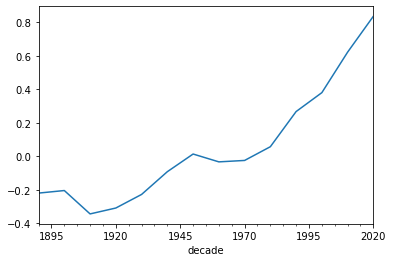

In [262]:
temp_anomaly_resample_decade["mean"].plot()

<AxesSubplot:xlabel='decade'>

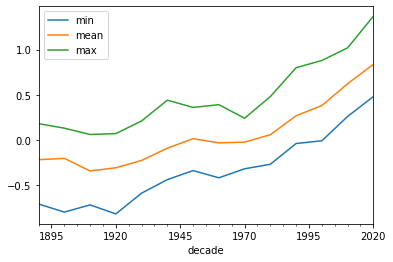

In [265]:
temp_anomaly_resample_decade[['min','mean','max']].plot()

<AxesSubplot:xlabel='decade', ylabel='mean'>

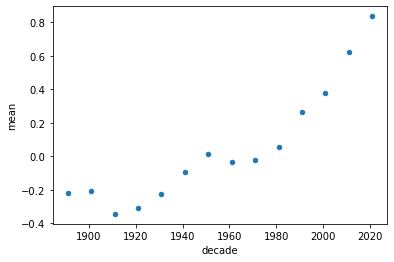

In [271]:
temp_anomaly_resample_decade.reset_index().plot.scatter(x = 'decade', y = "mean")

### Relational

#### scatterplot, no legend

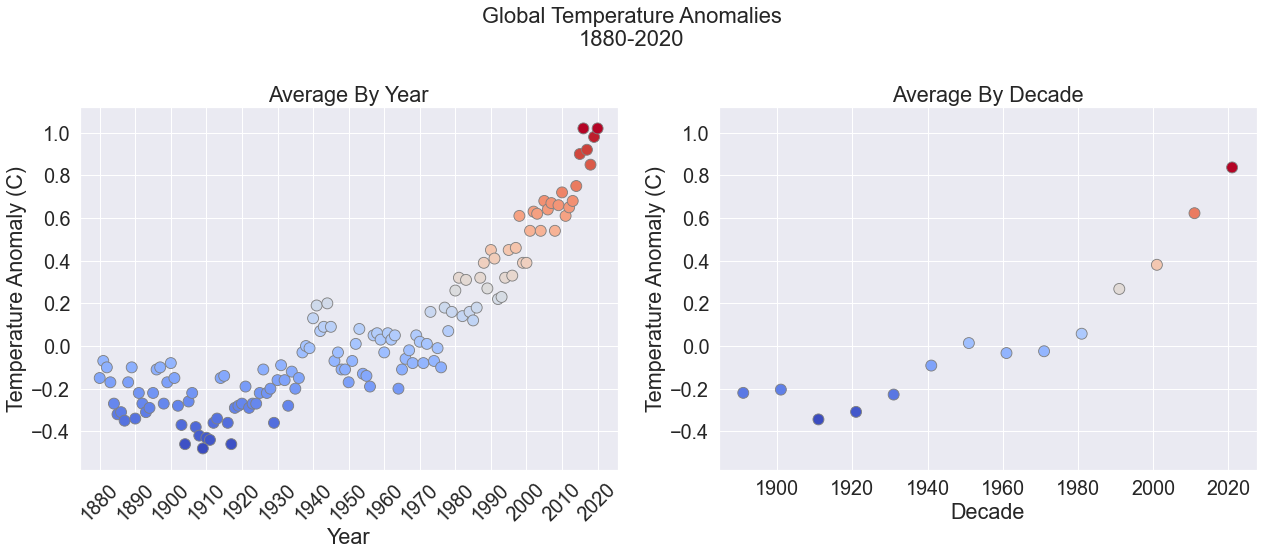

In [260]:
sns.set(font_scale=1.8, style="darkgrid")
f, (ax1, ax2) = plt.subplots(1,2,figsize=(18, 8))

dtf = mdates.DateFormatter("%Y")

y_axis_max = temp_anomaly_annual_join["anomaly"].max() + 0.1
y_axis_min = temp_anomaly_annual_join["anomaly"].min() - .1

sns.scatterplot(x=temp_anomaly_annual_join.index.values,
                y=temp_anomaly_annual_join["anomaly"],
                hue=temp_anomaly_annual_join["anomaly"],
                legend=False,
                palette="coolwarm",
                edgecolor='grey',
                s=120,
                ax=ax1)
ax1.set(title="Average By Year",
        xlabel="Year",
        ylabel="Temperature Anomaly (C)")

ax1.xaxis.set_major_locator(mdates.YearLocator(10))
ax1.xaxis.set_major_formatter(dtf)
ax1.set(ylim=[y_axis_min,y_axis_max])
ax1.margins(0.04)

sns.scatterplot(x=temp_anomaly_resample_decade.index.values,
                y=temp_anomaly_resample_decade["mean"],
                hue=temp_anomaly_resample_decade["mean"],
                legend=False,
                palette="coolwarm",
                edgecolor='grey',
                marker='o',
                s=120,
                ax=ax2)
ax2.set(title="Average By Decade",
       xlabel="Decade",
       ylabel="Temperature Anomaly (C)")
ax2.xaxis.set_major_locator(mdates.YearLocator(20))
ax2.xaxis.set_major_formatter(dtf)
ax2.set(ylim=[y_axis_min,y_axis_max])
ax2.margins(0.05)

plt.setp(ax1.get_xticklabels(), rotation = 45)
plt.suptitle("Global Temperature Anomalies\n1880-2020",fontsize=22)
plt.tight_layout()

plt.savefig(os.path.join(ea_output_dir, "Global-Temperature-Anomalies-1880-2020.png"))  
plt.show()

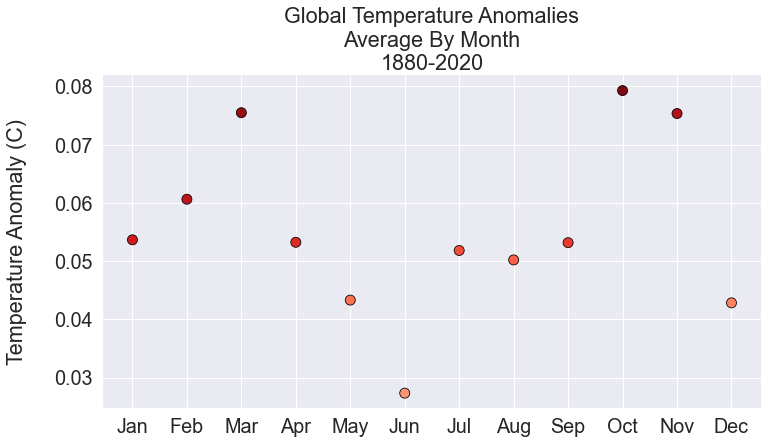

In [261]:
sns.set(style="darkgrid")
with sns.plotting_context("notebook", font_scale=1.8):

#        kind="scatter",  marker="o", s=100, edgecolor="black", hue="avg_anomaly", palette=anomaly_color_palette,
#        kind="line",  marker="o", markersize=10,
    
    g = sns.relplot(
        kind="scatter",  marker="o", s=100, edgecolor="black", hue="avg_anomaly", palette=anomaly_color_palette,
        data=grouped_by_month,
        x="month",
        y="avg_anomaly",
        height=6,
        aspect=1.8,
        legend=False,
       )

    g.set(title = "Global Temperature Anomalies\nAverage By Month\n1880-2020",
          xlabel = None,
          ylabel = "Temperature Anomaly (C)\n")

plt.show()

#### scatterplot, using ranked values

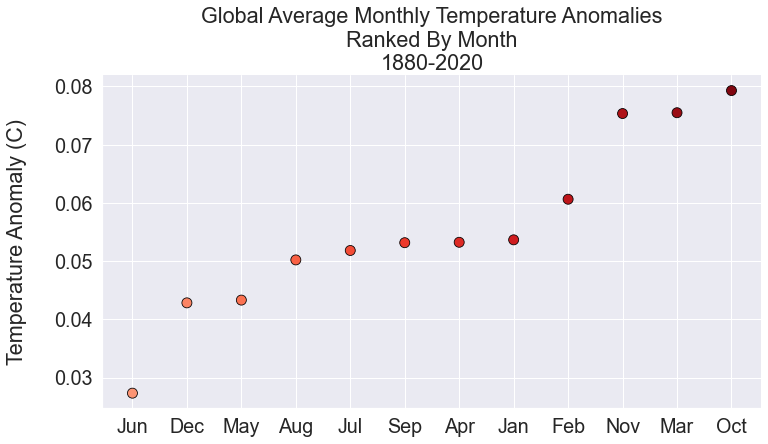

In [262]:
sns.set(style="darkgrid")
with sns.plotting_context("notebook", font_scale=1.8):

#        kind="scatter",  marker="o", s=100, edgecolor="black", hue="avg_anomaly", palette=anomaly_color_palette,
#        kind="line",  marker="o", markersize=10,
    
    g = sns.relplot(
        kind="scatter",  marker="o", s=100, edgecolor="black", hue="avg_anomaly", palette=anomaly_color_palette,
        data=ranked_data,
        x="month",
        y="avg_anomaly",
        height=6,
        aspect=1.8,
        legend=False
       )

    g.set(title = "Global Average Monthly Temperature Anomalies\nRanked By Month\n1880-2020",
          xlabel = None,
          ylabel = "Temperature Anomaly (C)\n")

plt.show()

#### scatterplot, with legend

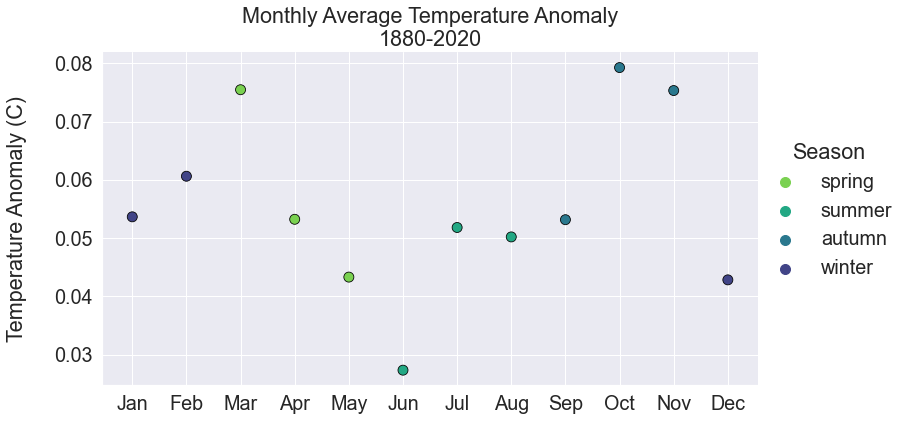

In [263]:
sns.set(style="darkgrid")
with sns.plotting_context("notebook", font_scale=1.8):

#  kind="scatter",  s=100,  edgecolor='black',

    g = sns.relplot(
        kind="scatter",  s=100,  edgecolor="black",
        data=grouped_by_month,
        x="month",
        y="avg_anomaly",
        hue="season",
        palette=seasons_palette_dict,
        height=6,
        aspect=1.8)

    g.set(title = "Monthly Average Temperature Anomaly\n1880-2020",
          xlabel = None,
          ylabel = "Temperature Anomaly (C)\n")
    
    # o override default legend title, labels, and symbol size
    legend_title = 'Season'
    g._legend.set_title(legend_title)
    
    legend_labels = ['spring','summer','autumn','winter']
    for t, l in zip(g._legend.texts, legend_labels):
        t.set_text(l)

    legend_symbol_size = [100]
    for lh in g._legend.legendHandles: 
        lh._sizes = legend_symbol_size 

plt.show()

#### lineplot, with legend

##### 10 year average by month

In [264]:
decades_list = list(temp_anomaly_10_yr_avg_by_month['year'].unique())
decades_list.reverse()
count_decades=len(decades_list)
print(decades_list)

[2020, 2010, 2000, 1990, 1980, 1970, 1960, 1950, 1940, 1930]


In [265]:
decade_palette = sns.color_palette("coolwarm_r", n_colors=count_decades)
decade_palette

[(0.8301865219490197, 0.30473276355294115, 0.25489142806666665),
 (0.9182816725843137, 0.48417347218039214, 0.37779392507058823),
 (0.963806056435294, 0.6341884145294118, 0.5137208491529413),
 (0.9616447383764706, 0.7580291825411765, 0.6617823791647058),
 (0.9094595977529412, 0.8393864797647058, 0.8003313524235294),
 (0.8180564934117647, 0.8555896775450981, 0.9146376165490196),
 (0.7087196897176471, 0.8057213889294117, 0.9811168090470588),
 (0.5814861481882353, 0.7134505955294117, 0.9983143529411764),
 (0.4570464785254902, 0.5940055499294118, 0.963029229690196),
 (0.3383765114431373, 0.45281860883137254, 0.8793170768784313)]

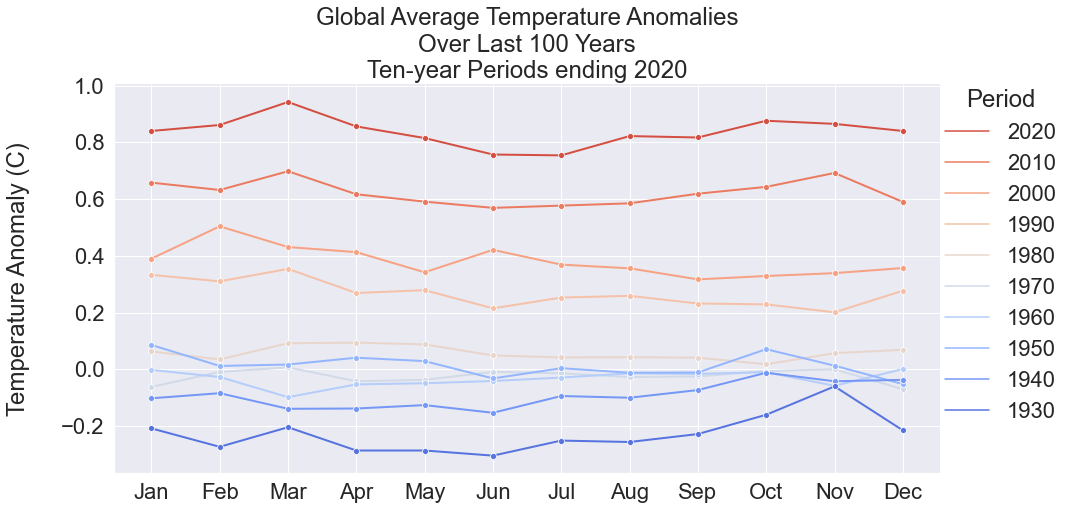

In [266]:
sns.set(style="darkgrid")
with sns.plotting_context("notebook", font_scale=2):

    g = sns.relplot(
        data=temp_anomaly_10_yr_avg_by_month ,
        x="month",
        y="anomaly",
        hue="year",
        hue_order=decades_list,
        alpha=1.0,
        kind="line",
        palette=decade_palette,
        marker='o',
        markersize=6,
        linewidth=2,
        height=7,
        aspect=1.9)


    g.set(title = "Global Average Temperature Anomalies\nOver Last 100 Years\nTen-year Periods ending 2020",
          xlabel = None,
          ylabel = "Temperature Anomaly (C)\n")
    
    legend_title = 'Period'
    g._legend.set_title(legend_title)

plt.show()

#### lineplot, no legend

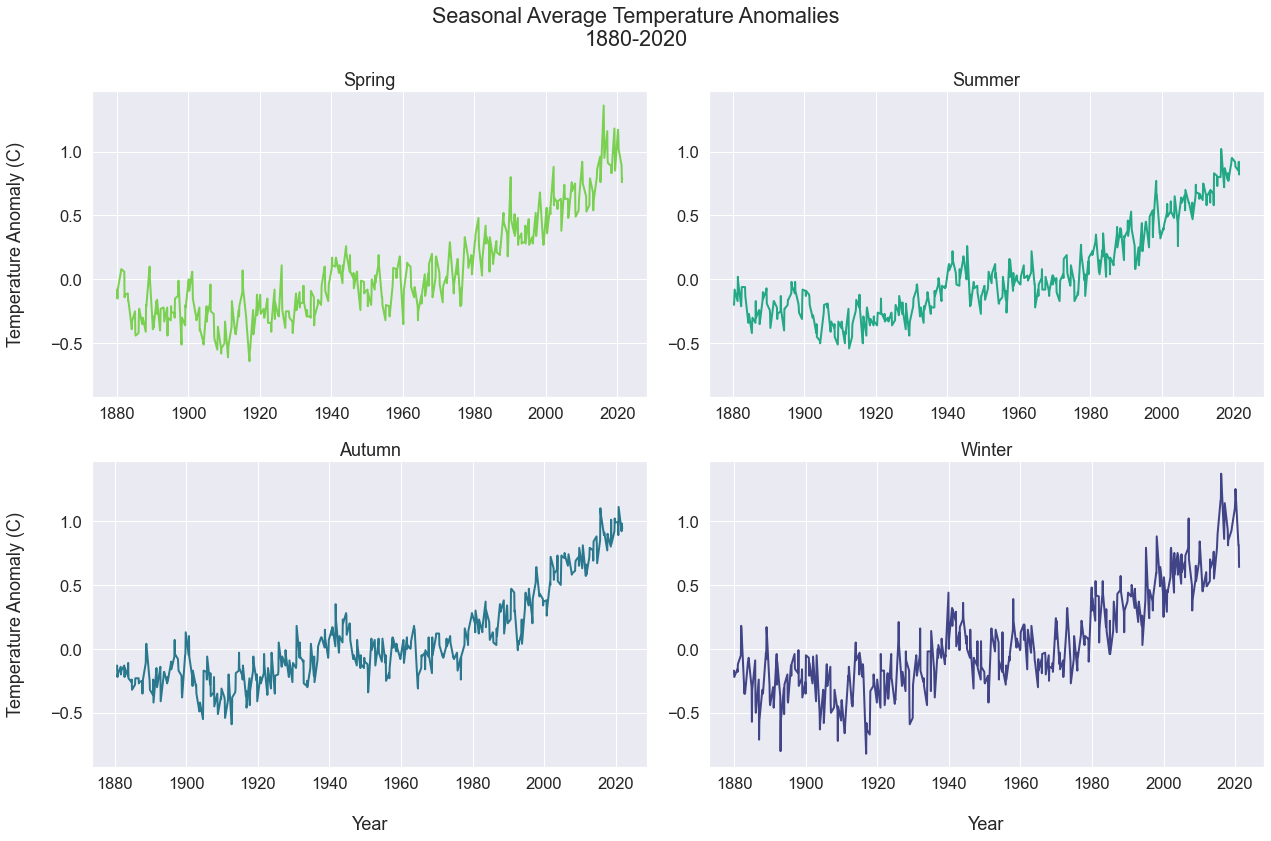

In [267]:
sns.set(font_scale=1.5, style="darkgrid")
f, axs = plt.subplots(2,2, figsize=(18, 12))

ax1 = axs[0][0]
ax2 = axs[0][1]
ax3 = axs[1][0]
ax4 = axs[1][1]

line_width = 2

min_temp = min(
    winter_temps.anomaly.min(),
    spring_temps.anomaly.min(),
    summer_temps.anomaly.min(),
    autumn_temps.anomaly.min()
)
y_axis_min = min_temp - .1

max_temp = max(
    winter_temps.anomaly.max(),
    spring_temps.anomaly.max(),
    summer_temps.anomaly.max(),
    autumn_temps.anomaly.max()
)
y_axis_max = max_temp + 0.1

sns.lineplot(ax=ax1,
             x=spring_temps.index.values,
             y=spring_temps.anomaly,
             color=seasons_palette_dict.get("Spring"),
             linewidth=line_width,
             legend=False)
sns.lineplot(ax=ax2,
             x=summer_temps.index.values,
             y=summer_temps.anomaly,
             color=seasons_palette_dict.get("Summer"),
             linewidth=line_width,
             legend=False)
sns.lineplot(ax=ax3,
             x=autumn_temps.index.values,
             y=autumn_temps.anomaly,
             color=seasons_palette_dict.get("Autumn"),
             linewidth=line_width,
             legend=False)
sns.lineplot(ax=ax4,
             x=winter_temps.index.values,
             y=winter_temps.anomaly,
             color=seasons_palette_dict.get("Winter"),
             linewidth=line_width,
             legend=False)

ax1.set(ylim=[y_axis_min,y_axis_max])
ax2.set(ylim=[y_axis_min,y_axis_max])
ax3.set(ylim=[y_axis_min,y_axis_max])
ax4.set(ylim=[y_axis_min,y_axis_max])


ax1.set(title="Spring",
        xlabel=None,
        ylabel="Temperature Anomaly (C)\n")
ax2.set(title="Summer",
        xlabel=None,
        ylabel=None)
ax3.set(title="Autumn",
        xlabel ="\nYear",
        ylabel="Temperature Anomaly (C)\n")
ax4.set(title="Winter",
        xlabel ="\nYear",
        ylabel=None)

plt.suptitle("Seasonal Average Temperature Anomalies\n1880-2020")
plt.tight_layout()
plt.show()

### Categorical

#### barplot, boxsplot, stripplot, swarmplot (no legend)

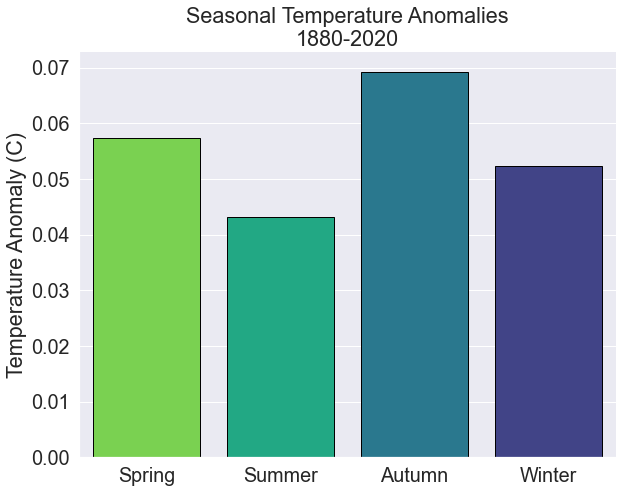

In [268]:
with sns.plotting_context("notebook", font_scale=1.8):

#        kind="bar", saturation=1.0, alpha=1.0, ci=None, edgecolor='black',
#        kind="box", saturation=1.0,
#        kind="strip", s=5, alpha=1.0, jitter=True, 
#        kind="swarm", s=5, alpha=1.0,
    
    g = sns.catplot(
        kind="bar", saturation=1.0, alpha=1.0, ci=None, edgecolor='black',
        data=temp_anomaly_months_tidy,
        x="season",
        y="anomaly",
        palette=seasons_palette_dict,
        height=7,
        aspect=1.3,
        order=seasons)

    g.set(title = "Seasonal Temperature Anomalies\n1880-2020",
       xlabel = None,
       ylabel = "Temperature Anomaly (C)")
plt.show()

#### barplot, boxsplot, stripplot, swarmplot (with legend: hue=)

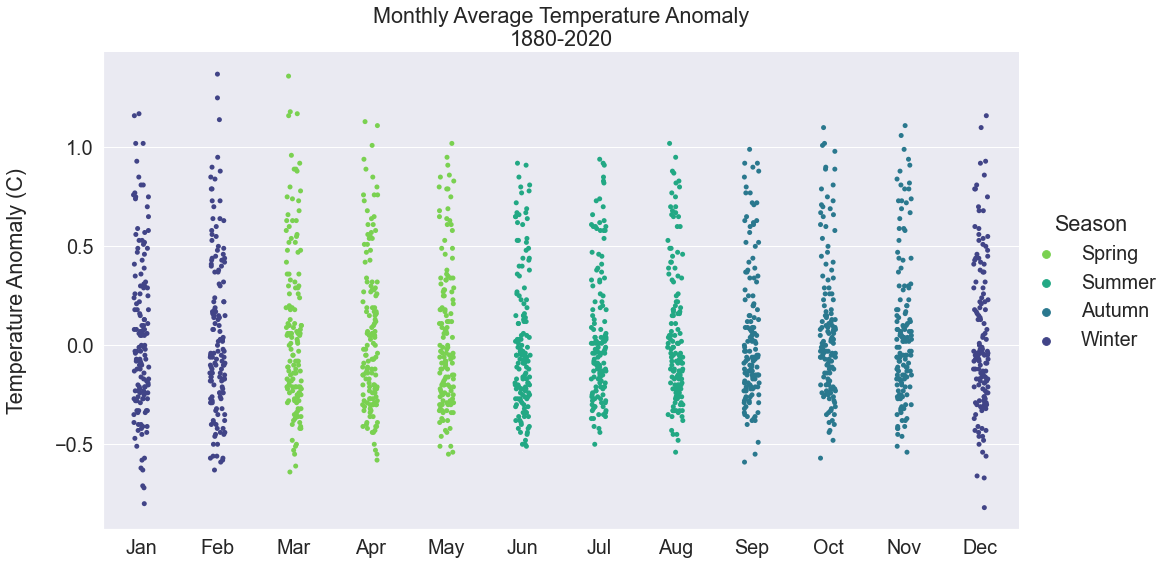

In [269]:
sns.set(style="darkgrid")
with sns.plotting_context("notebook", font_scale=1.8):

#        kind="bar", saturation=1.0, alpha=1.0, ci=None, edgecolor='black', dodge=False,
#        kind="box", saturation=1.0, dodge=False,
#        kind="strip", s=5, alpha=1.0, jitter=True, 
#        kind="swarm", s=5, alpha=1.0,    

    g = sns.catplot(
        kind="strip", s=5, alpha=1.0, jitter=True, 
        data=temp_anomaly_months_tidy,
        x="month",
        y="anomaly",
        palette=seasons_palette_dict,
        height=8,
        aspect=1.8,
        hue="season",
       )

    g.set(title = "Monthly Average Temperature Anomaly\n1880-2020",
          xlabel = None,
          ylabel = "Temperature Anomaly (C)\n")
    
    legend_title = 'Season'
    g._legend.set_title(legend_title)

plt.show()


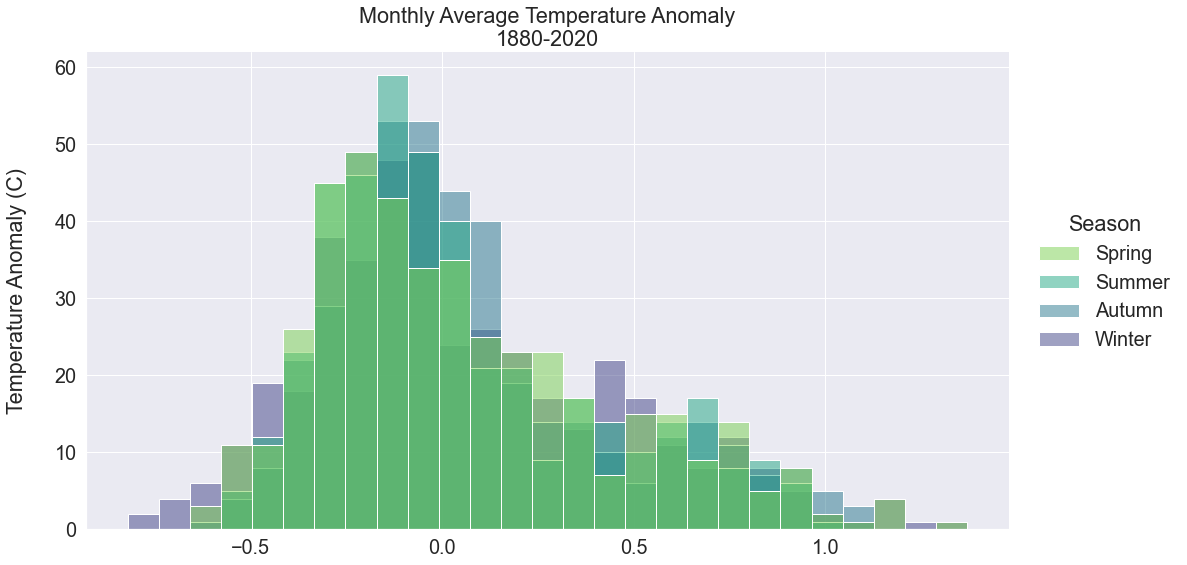

In [270]:
sns.set(style="darkgrid")
with sns.plotting_context("notebook", font_scale=1.8):

    g = sns.displot(
        data=temp_anomaly_months_tidy,
        x="anomaly",
        hue="season",
        palette=seasons_palette_dict,
        alpha=0.5, 
        height=8, 
        aspect=1.8)
    
    g.set(title = "Monthly Average Temperature Anomaly\n1880-2020",
          xlabel = None,
          ylabel = "Temperature Anomaly (C)\n")
    
    legend_title = 'Season'
    g._legend.set_title(legend_title)


plt.show()


<a id='Pandas-Export'></a>
## Export

[Return to Start of Notebook](#Notebook)  

df.to_csv(path, header=False, index=False, sep=',')

In [273]:
# csv
save_path = os.path.join(ea_output_dir, 'global_temp_anomalies.csv')
temp_anomaly_months_tidy.to_csv(save_path,sep=',',header=False)